In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.dates as mdates

age = pd.read_csv('data/datasets_527325_1157664_TimeAge.csv')
gender = pd.read_csv('data/datasets_527325_1157664_TimeGender.csv')
province = pd.read_csv('data/datasets_527325_1157664_TimeProvince.csv')

# Age

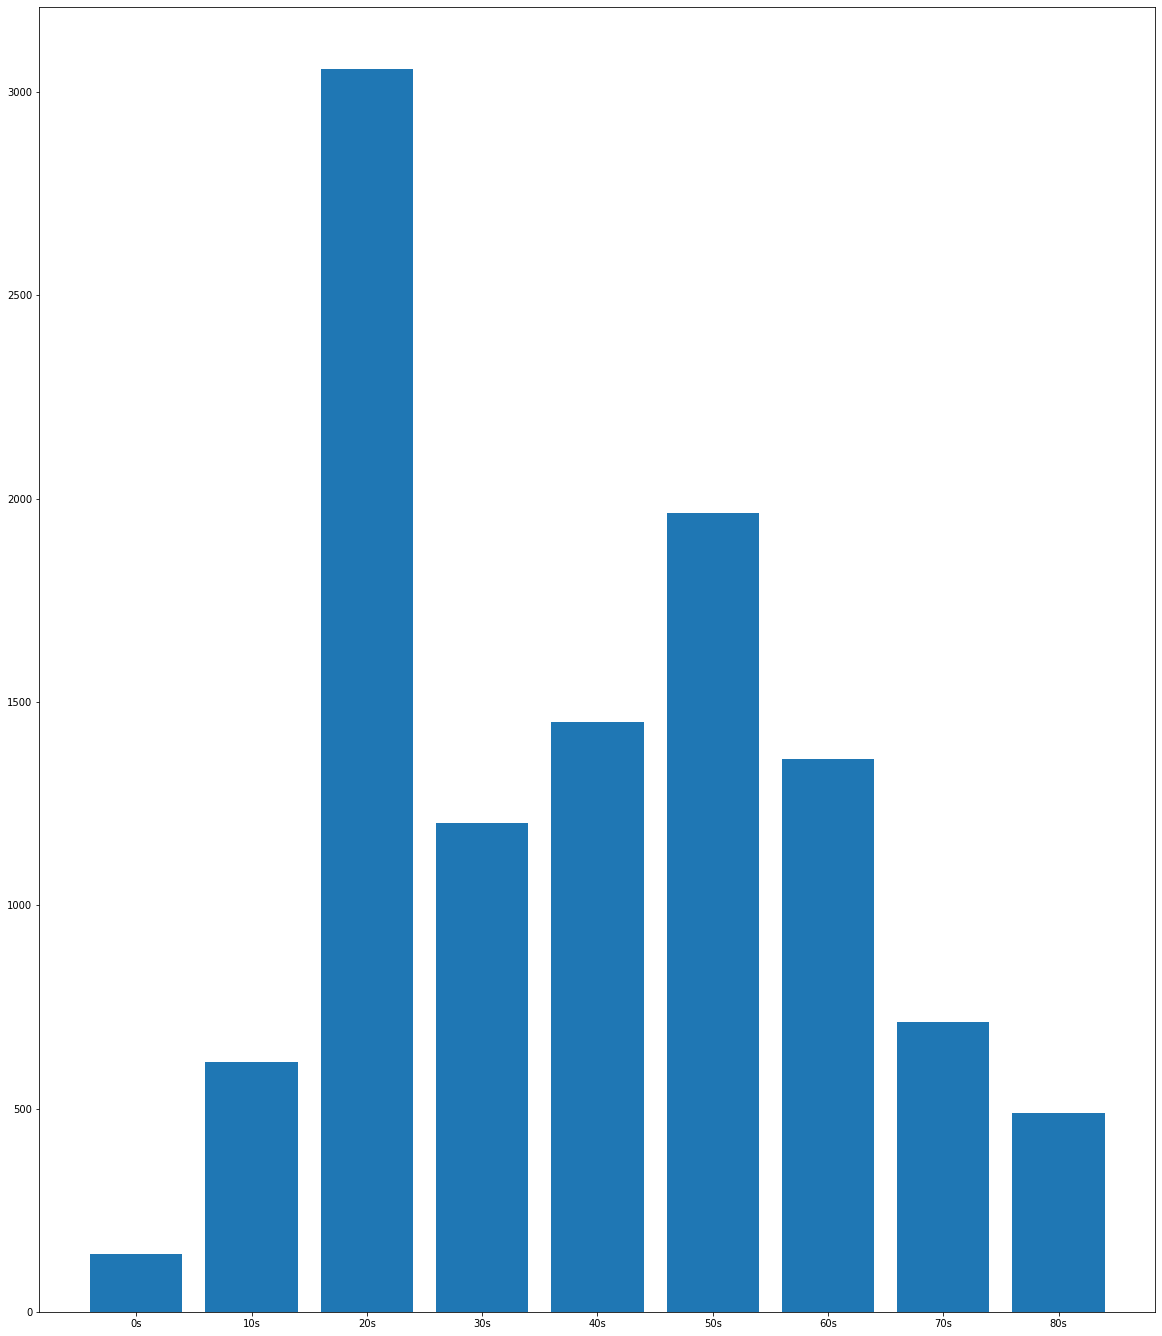

In [2]:
fig, ax = plt.subplots(figsize=(20,24))
bar = ax.bar(age['age'], age['confirmed'])



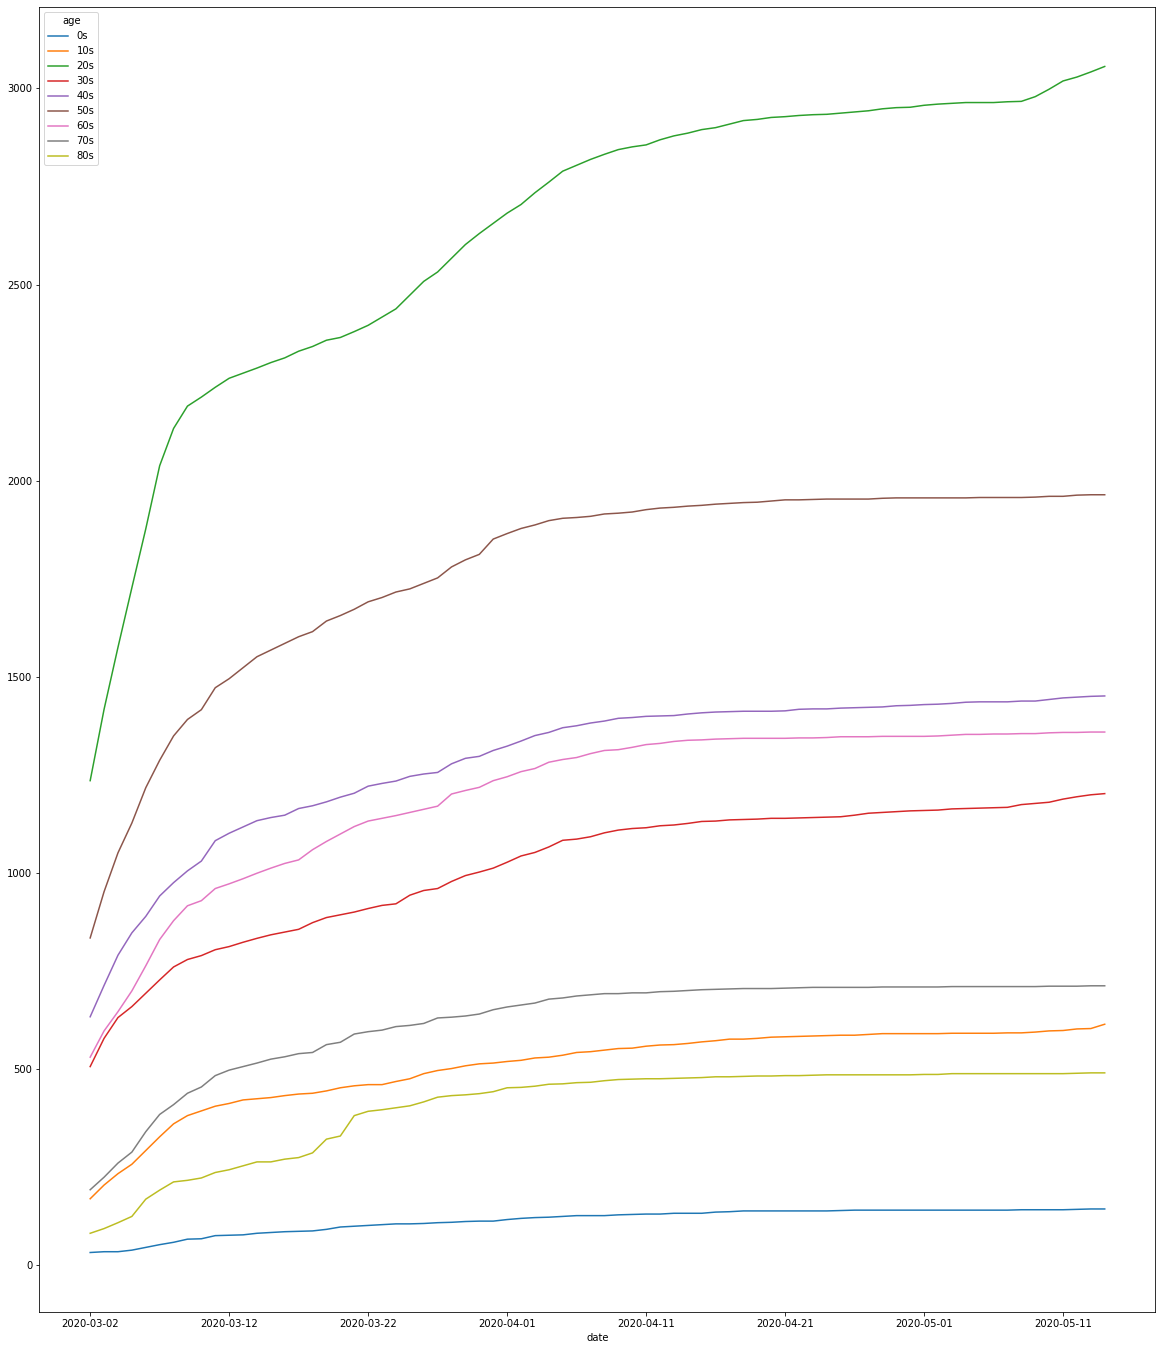

In [3]:
# 連續圖
# plot with each age
age.groupby(['date','age'])['confirmed'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

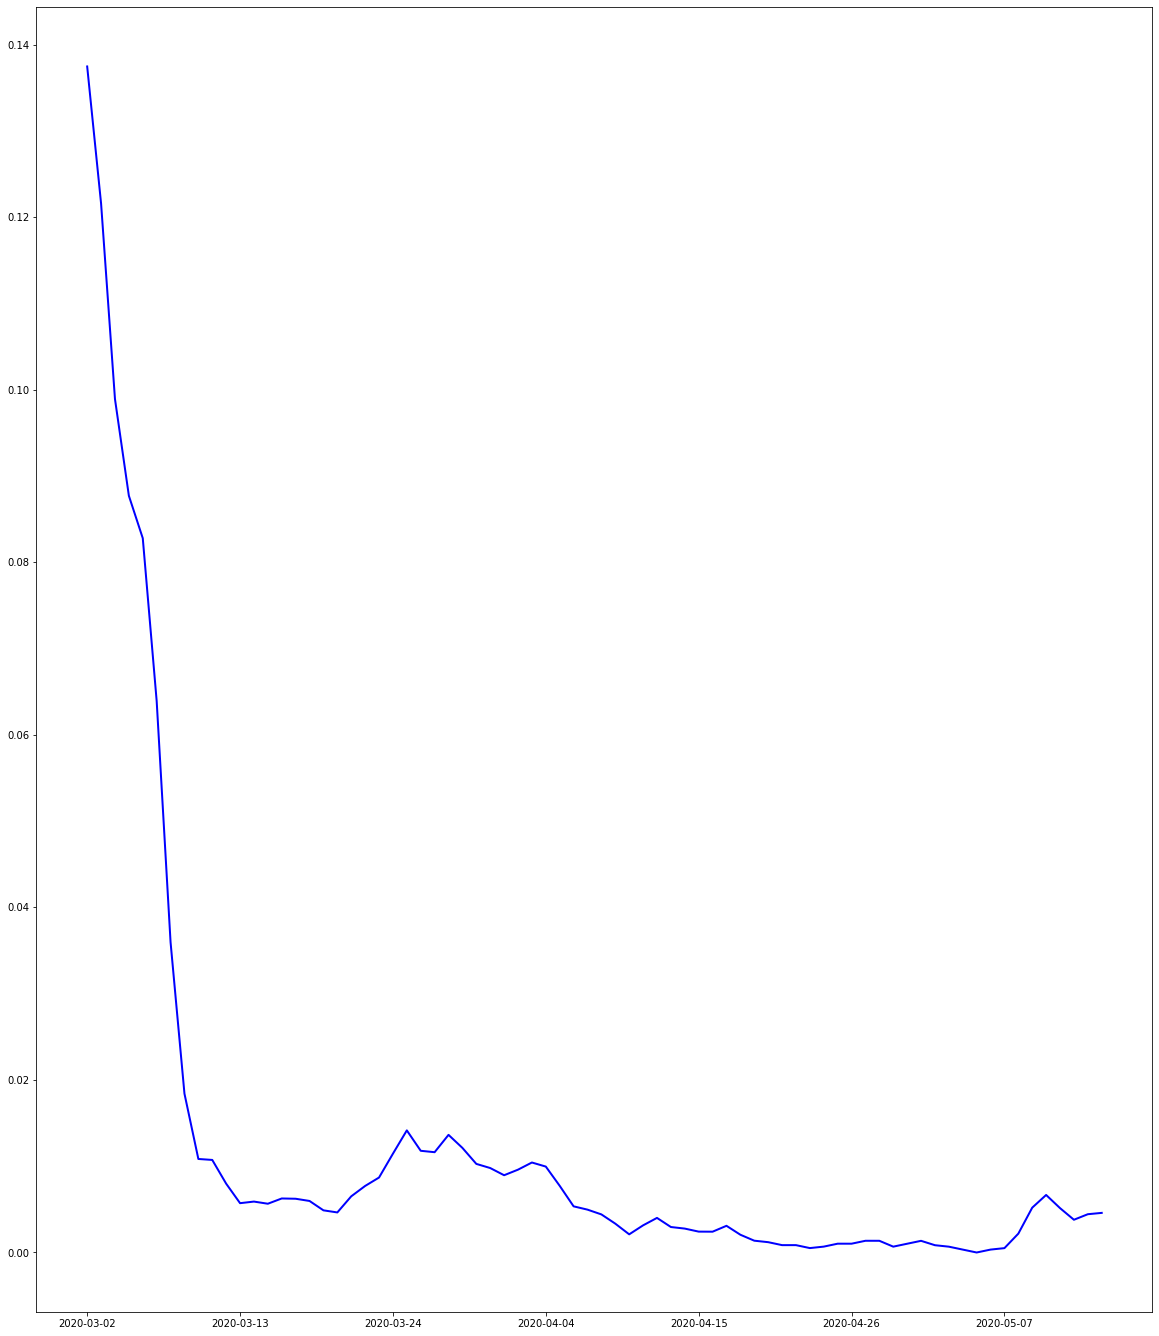

In [4]:
# 20s confirmed GrowthRate(logistic function)
age.loc[age['age']=='20s', 'GrowthRate']=np.gradient(np.log(age.loc[age['age']=='20s', 'confirmed']))
fig, ax = plt.subplots(figsize=(20,24))
ax.plot(age.date.unique(), age.loc[age['age']=='20s', 'GrowthRate'], color = 'blue', linewidth = 2, label='20s')
ax.set_xticks(ax.get_xticks()[::11])

20s確診增長速率，不確定有無作用。

(-1.1100441190143997,
 1.100478296757703,
 -1.1109708543184509,
 1.1073780548094794)

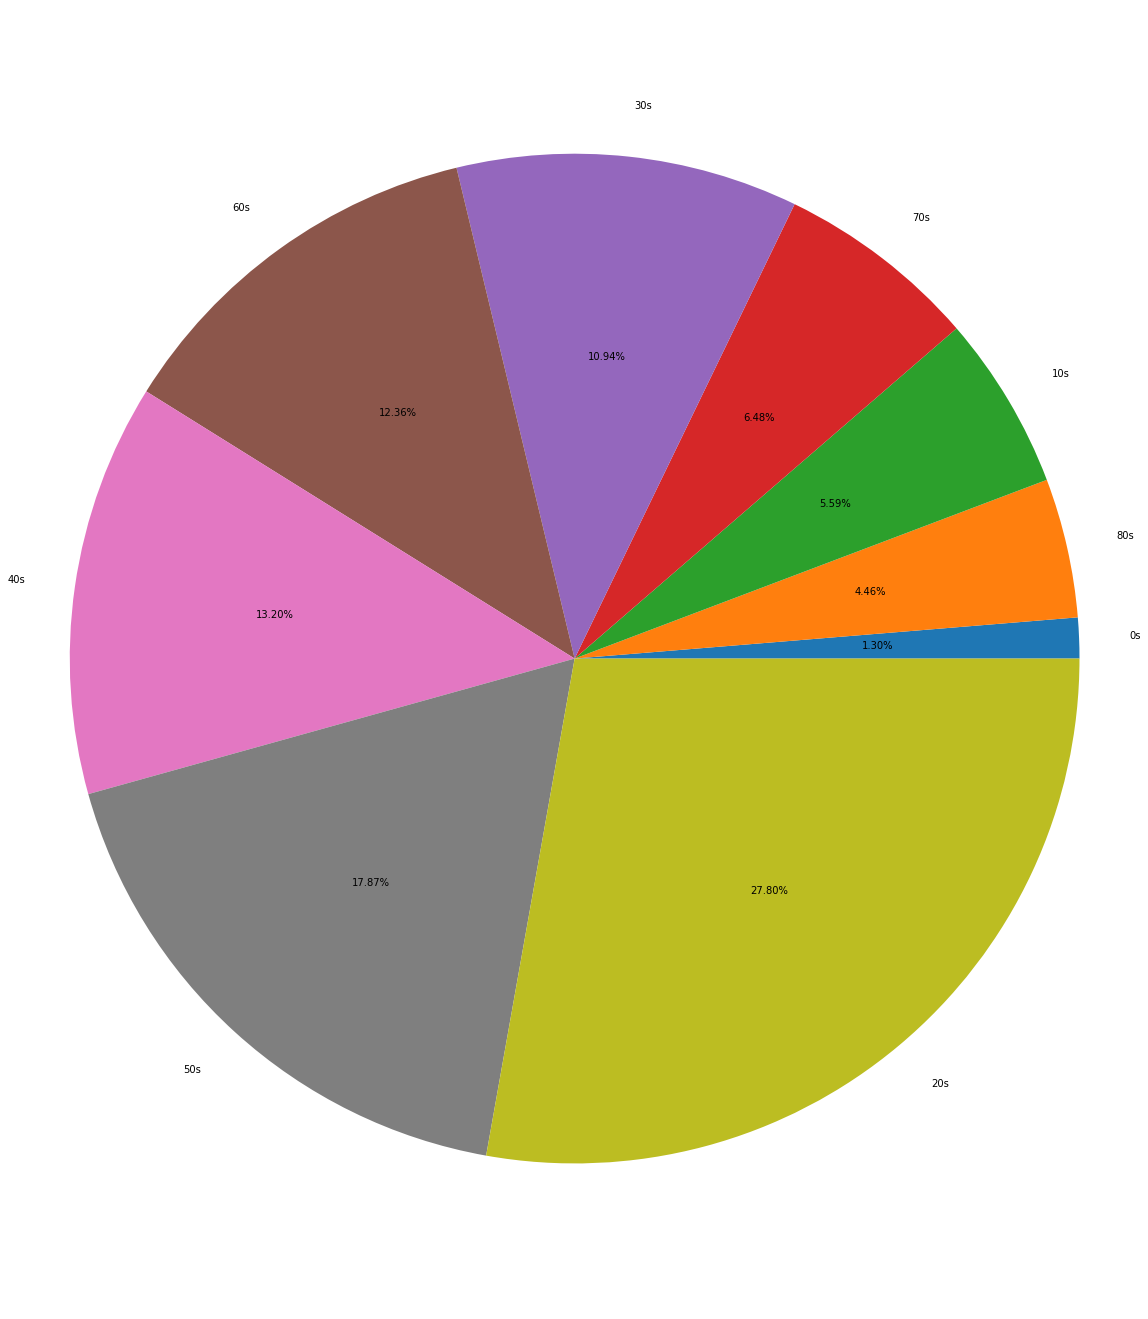

In [5]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = age['age'].unique()
size = list(age.loc[age['date'] == '2020-05-14', 'confirmed'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')


20s確診率較高，可能與生活習慣有關。

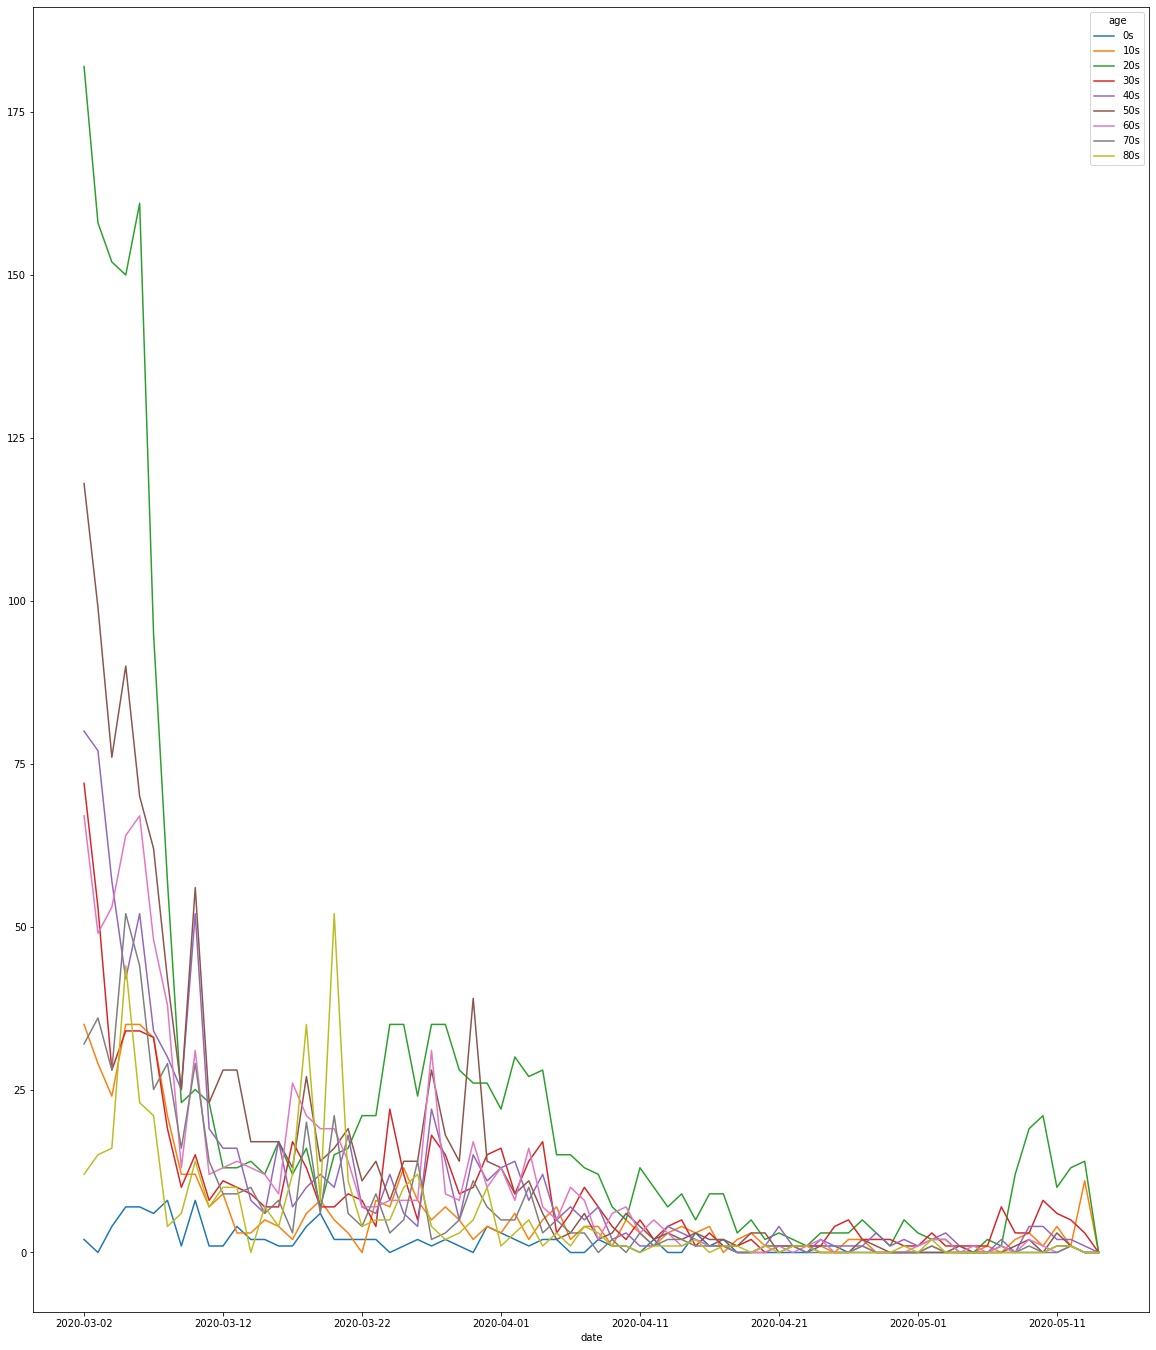

In [6]:
# daily confirmed
for title in age['age'].unique():
    day = age.loc[age['age']==title, 'confirmed']
    age.loc[age['age']==title, 'daily_confirmed'] = day.shift(-1) - day

age.groupby(['date','age'])['daily_confirmed'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

幾乎都是20s族群爆發，可能年輕人活動範圍較廣泛。

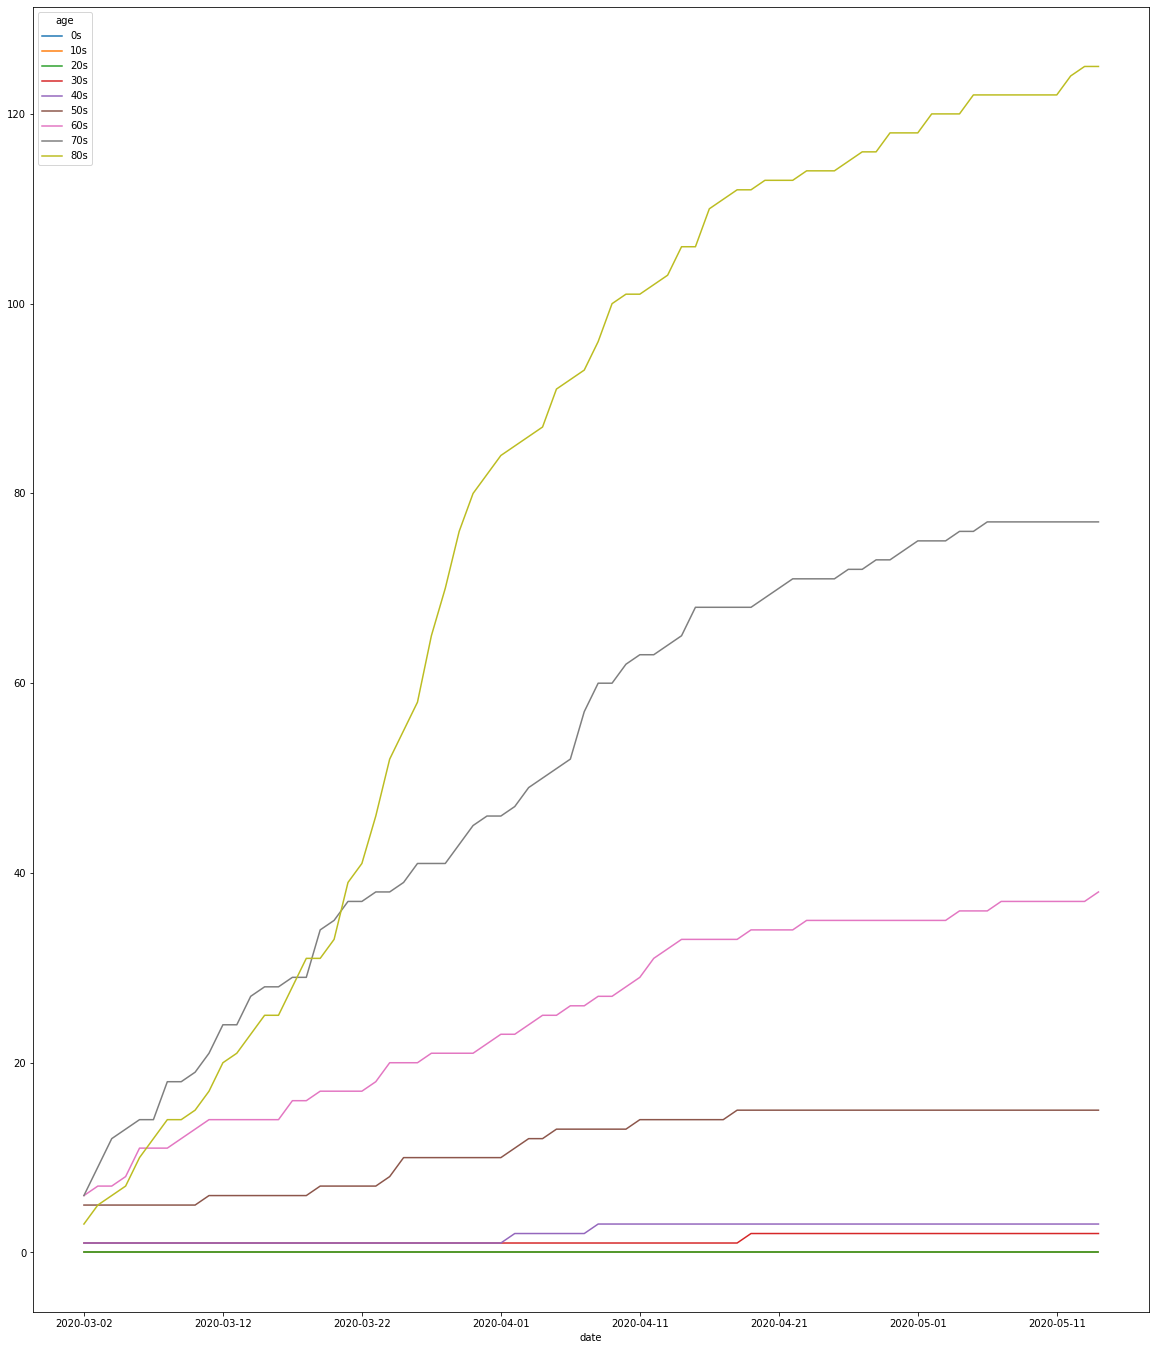

In [7]:
# 連續圖
# plot with each age
age.groupby(['date','age'])['deceased'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

(-1.1120580421091375,
 1.1005741924813874,
 -1.1148279318513958,
 1.1132247495111545)

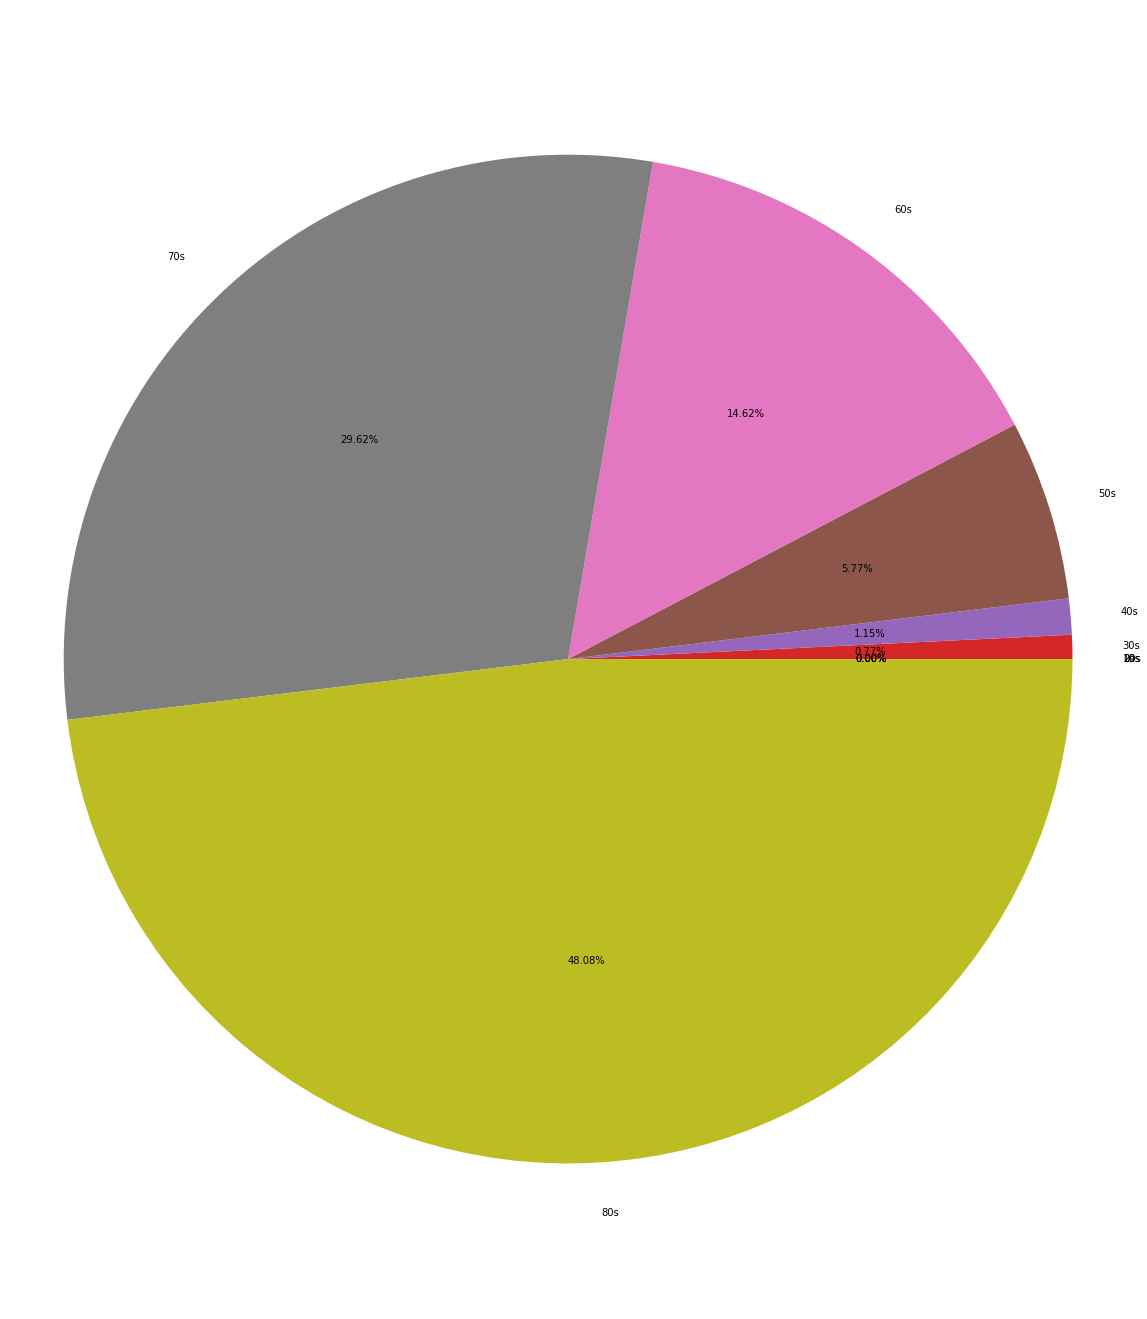

In [8]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = age['age'].unique()
size = list(age.loc[age['date'] == '2020-05-14', 'deceased'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')

年紀越大死亡率越高。

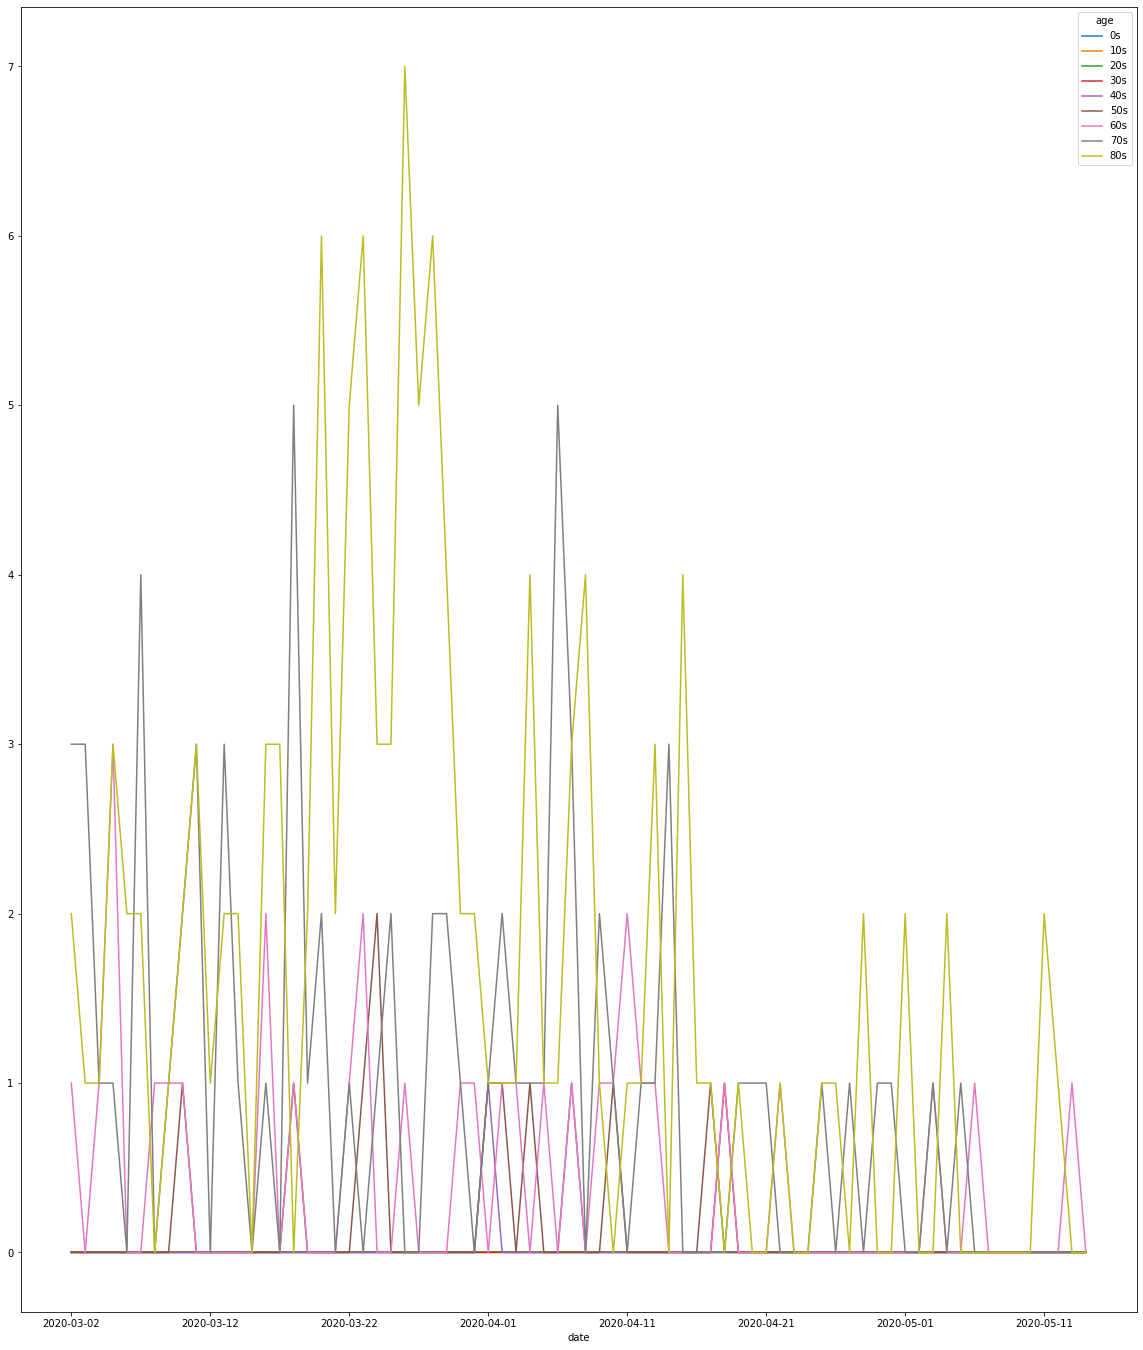

In [9]:
# daily deceased
for title in age['age'].unique():
    day = age.loc[age['age']==title, 'deceased']
    age.loc[age['age']==title, 'daily_deceased'] = day.shift(-1) - day

age.groupby(['date','age'])['daily_deceased'].sum() .unstack('age', fill_value=0).plot(legend=True, figsize=(20,24))

# Sex

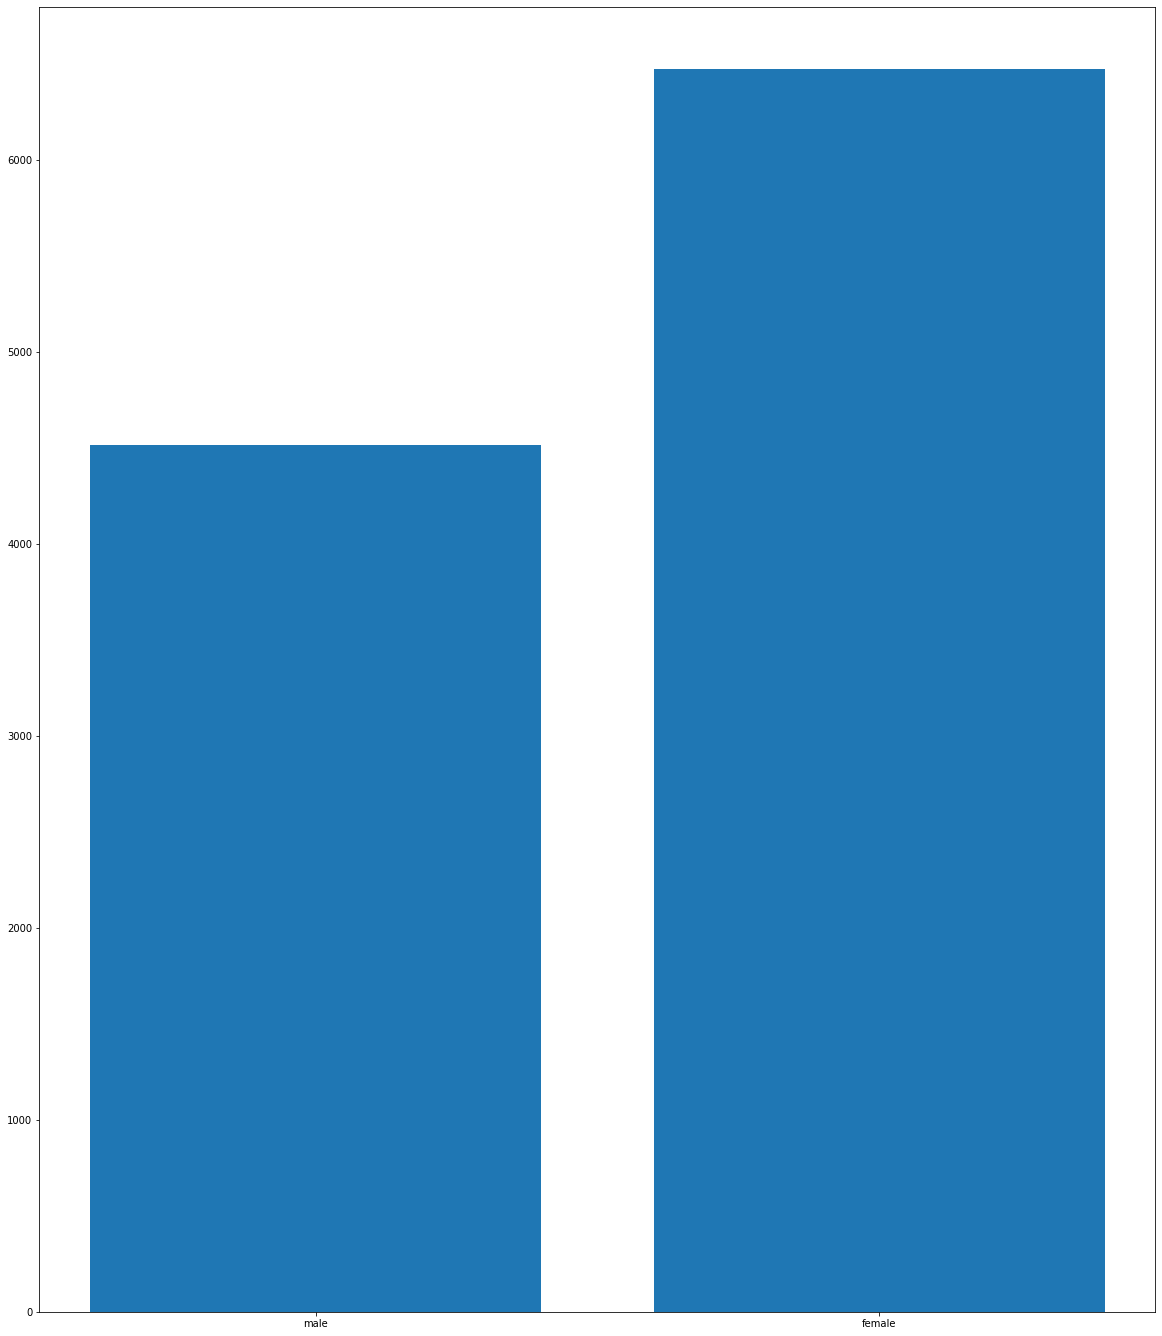

In [10]:
fig, ax = plt.subplots(figsize=(20,24))
sex_bar = ax.bar(gender['sex'], gender['confirmed'])


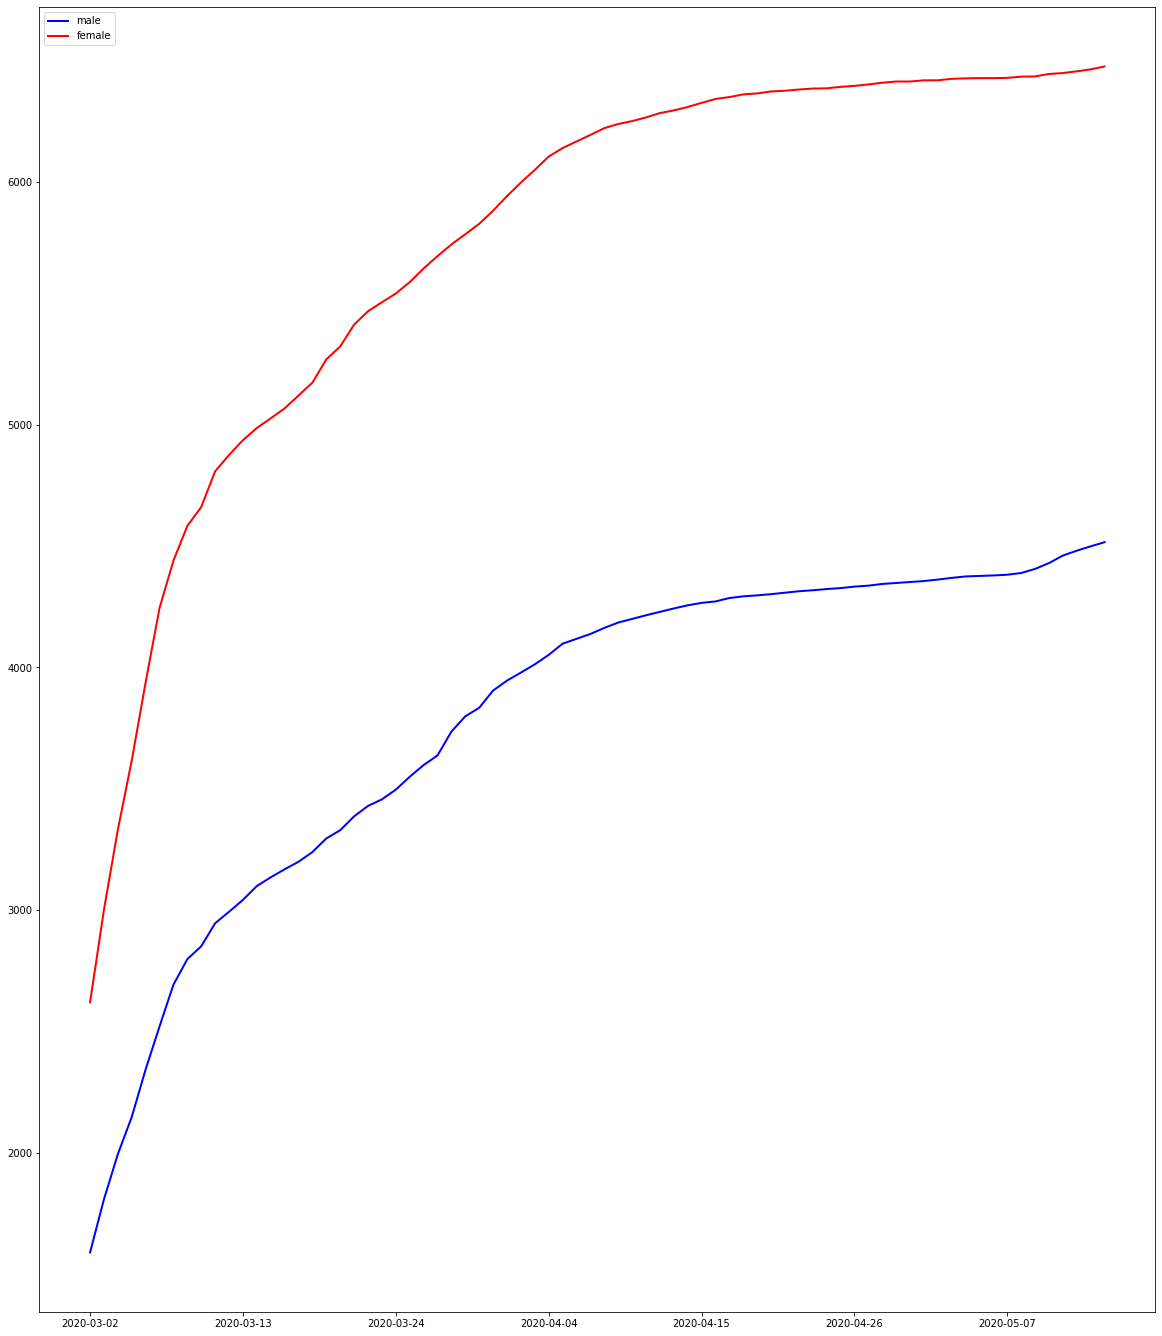

In [11]:
fig, ax = plt.subplots(figsize=(20,24))

# 連續圖
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'male', 'confirmed'], color = 'blue', linewidth = 2, label='male')
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'female', 'confirmed'], color = 'red', linewidth = 2, label='female')
plt.legend(loc='upper left')
ax.set_xticks(ax.get_xticks()[::11])

女性確診人數較男性高，可能與該地區性別比率影響。(http://www.koreaherald.com/view.php?ud=20191119000682)

(-1.1108328494587658,
 1.100515849974227,
 -1.1131282540232492,
 1.122648825558023)

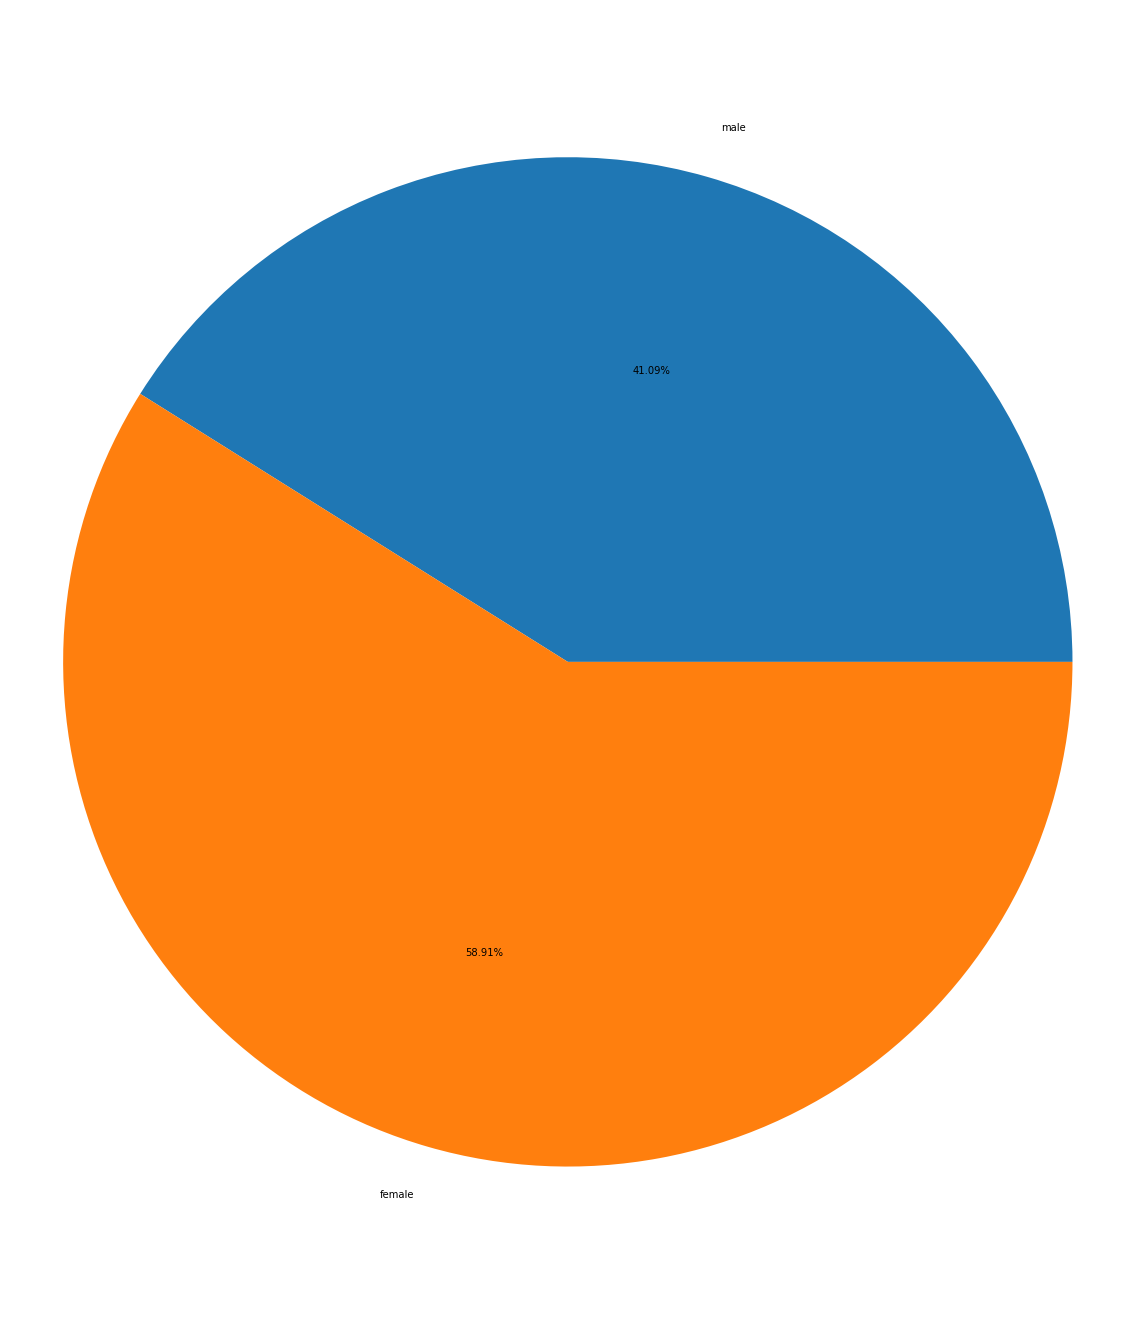

In [12]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = gender['sex'].unique()
size = list(gender.loc[gender['date'] == '2020-05-14', 'confirmed'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-05-14確診率2者女性較多。

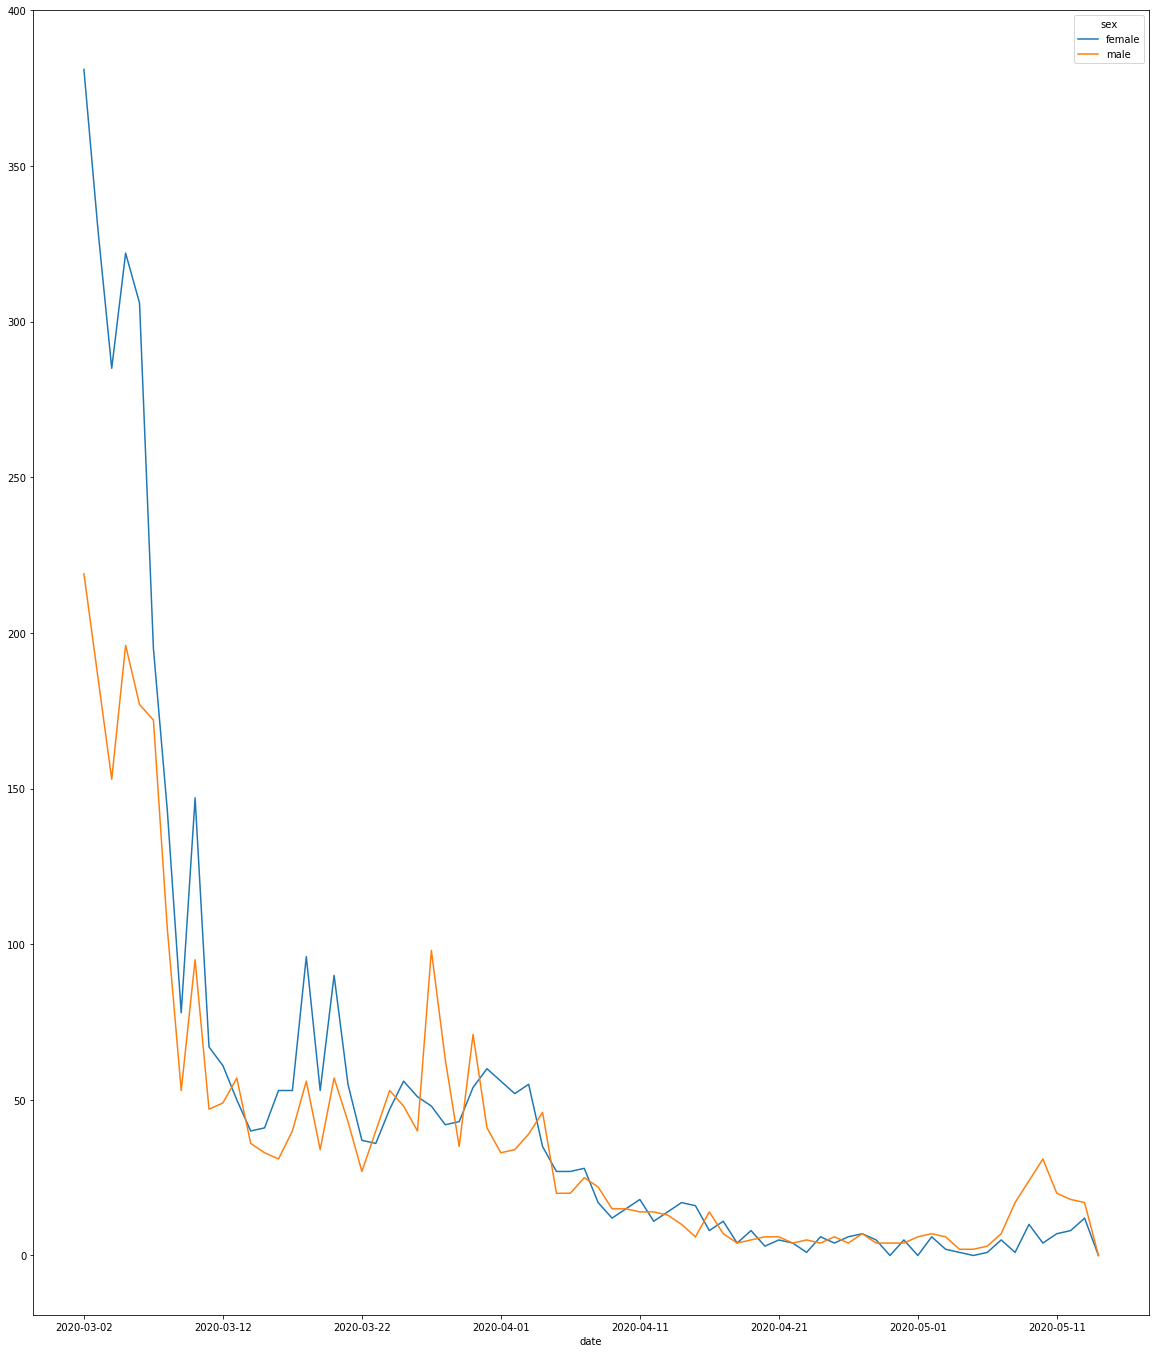

In [13]:
# daily confirmed
for title in gender['sex'].unique():
    day = gender.loc[gender['sex']==title, 'confirmed']
    gender.loc[gender['sex']==title, 'daily_confirmed'] = day.shift(-1) - day

gender.groupby(['date','sex'])['daily_confirmed'].sum() .unstack('sex', fill_value=0).plot(legend=True, figsize=(20,24))

女性確診率較高，因為爆發時女性確診數較多。每日病例可以觀察到並非女性較易確診。

## Deceased

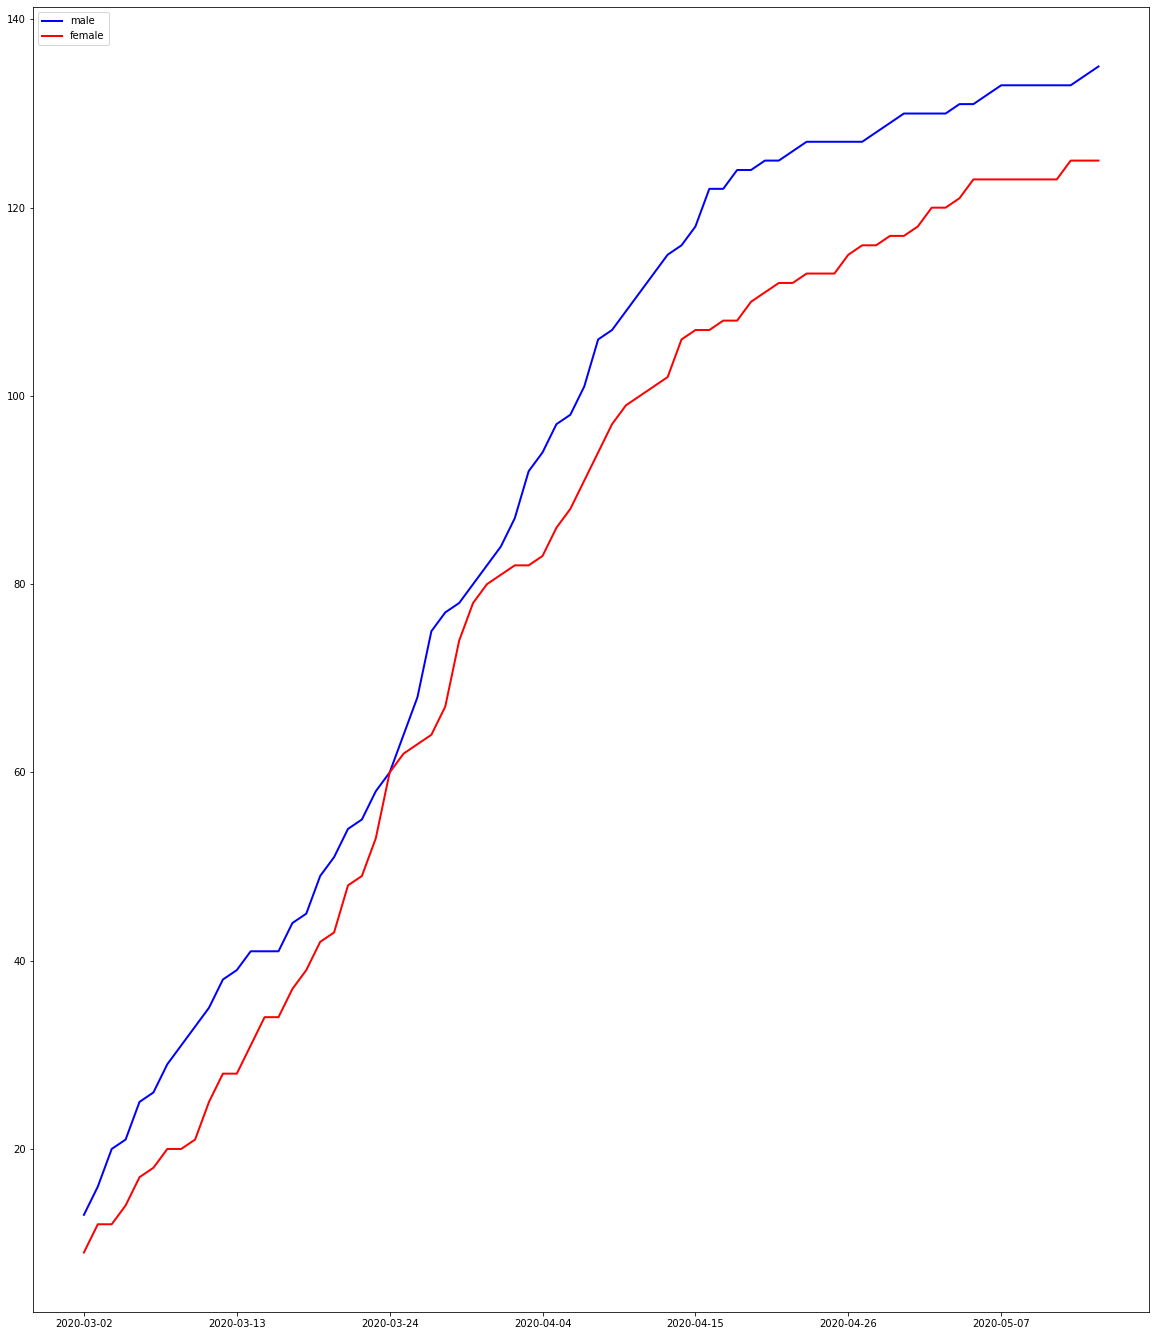

In [14]:
fig, ax = plt.subplots(figsize=(20,24))

# 連續圖
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'male', 'deceased'], color = 'blue', linewidth = 2, label='male')
ax.plot(gender.date.unique(), gender.loc[gender['sex'] == 'female', 'deceased'], color = 'red', linewidth = 2, label='female')
plt.legend(loc='upper left')
ax.set_xticks(ax.get_xticks()[::11])

男女累計死亡數，女性較男性高原因可能與女性確診人數較多有關。

(-1.109608027519042,
 1.1004575251199544,
 -1.1074096077844104,
 1.1145510328176322)

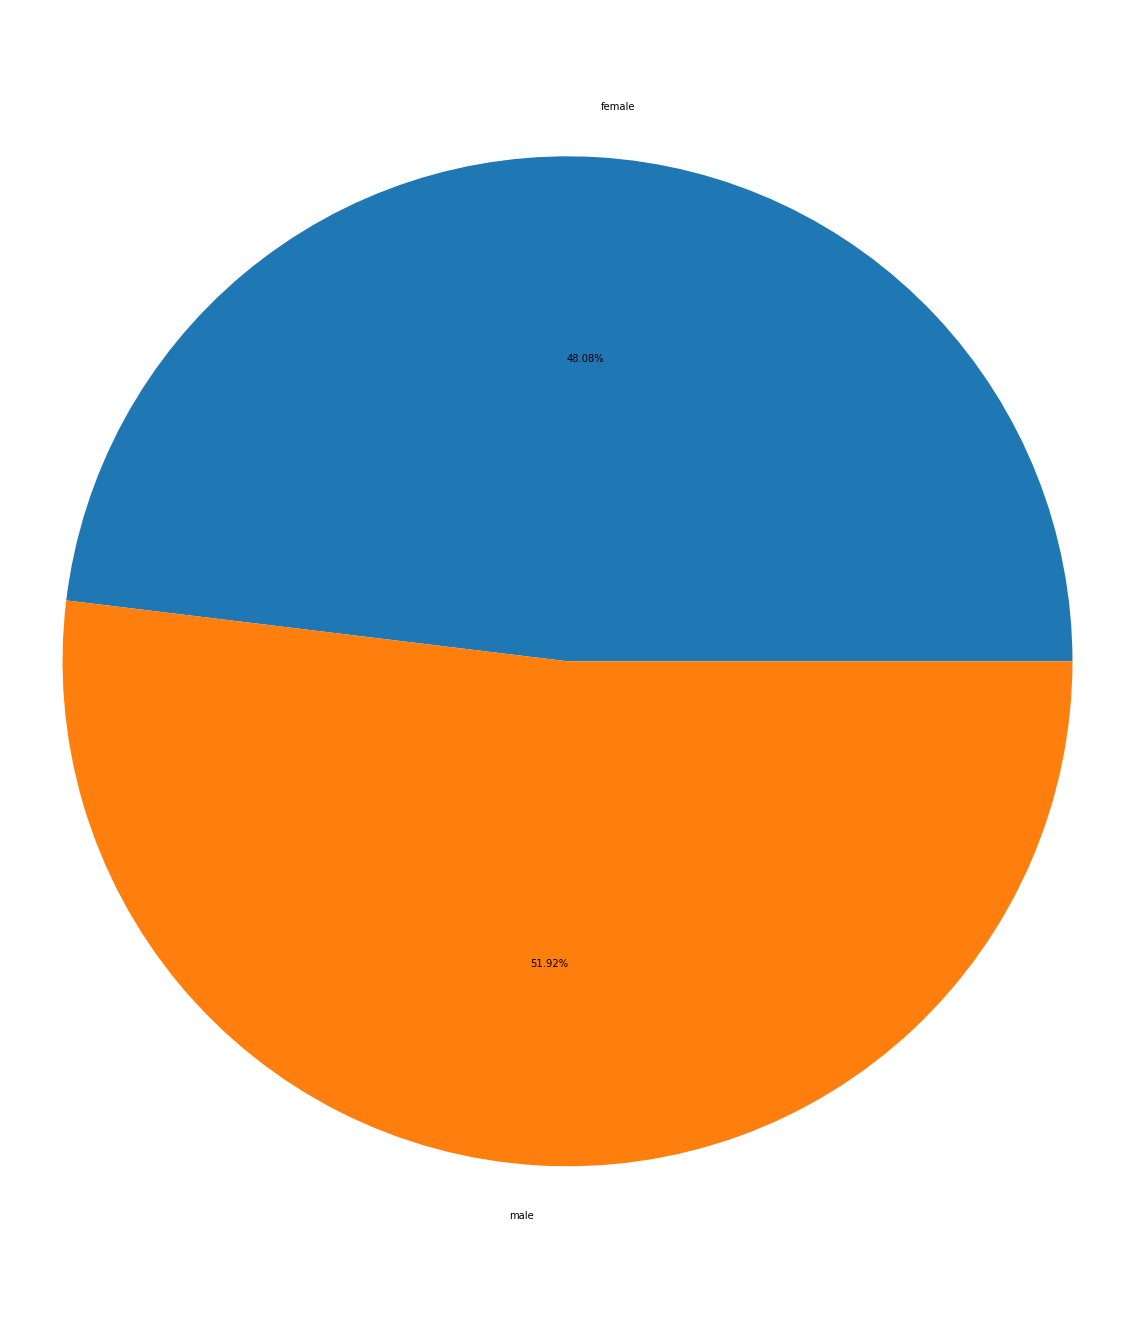

In [15]:
# pie plot
fig, ax = plt.subplots(figsize=(20,24))
order = pd.DataFrame()
order['age'] = gender['sex'].unique()
size = list(gender.loc[gender['date'] == '2020-05-14', 'deceased'])
order['size'] = size
order = order.sort_values(by=['size'])

ax.pie(order['size'], labels=order['age'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-05-14死亡率2者相差不大，性別與死亡率無關。

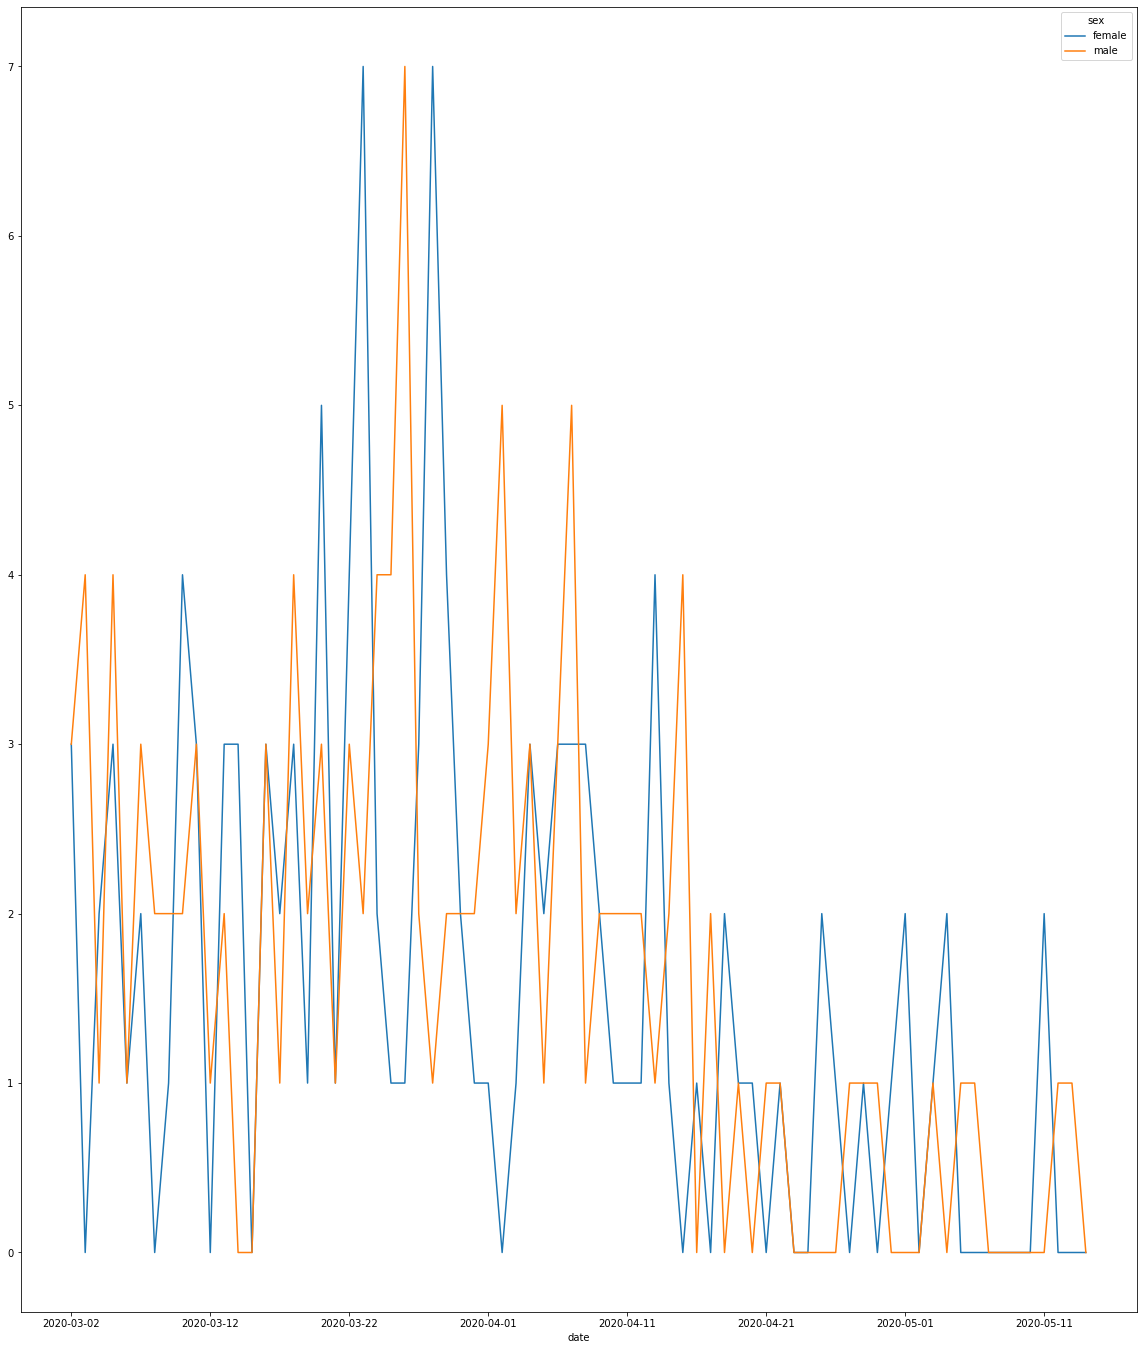

In [16]:
# daily deceased
for title in gender['sex'].unique():
    day = gender.loc[gender['sex']==title, 'deceased']
    gender.loc[gender['sex']==title, 'daily_deceased'] = day.shift(-1) - day

gender.groupby(['date','sex'])['daily_deceased'].sum() .unstack('sex', fill_value=0).plot(legend=True, figsize=(20,24))

每日死亡人數。

# Province

In [39]:
# fig, ax = plt.subplots(figsize=(28,28))
# province_bar = ax.bar(province['province'], province['confirmed'])
# plt.xticks(rotation=45)

(-1.1093421156697443,
 1.1004448747722126,
 -1.1055672134023797,
 1.1078921045876047)

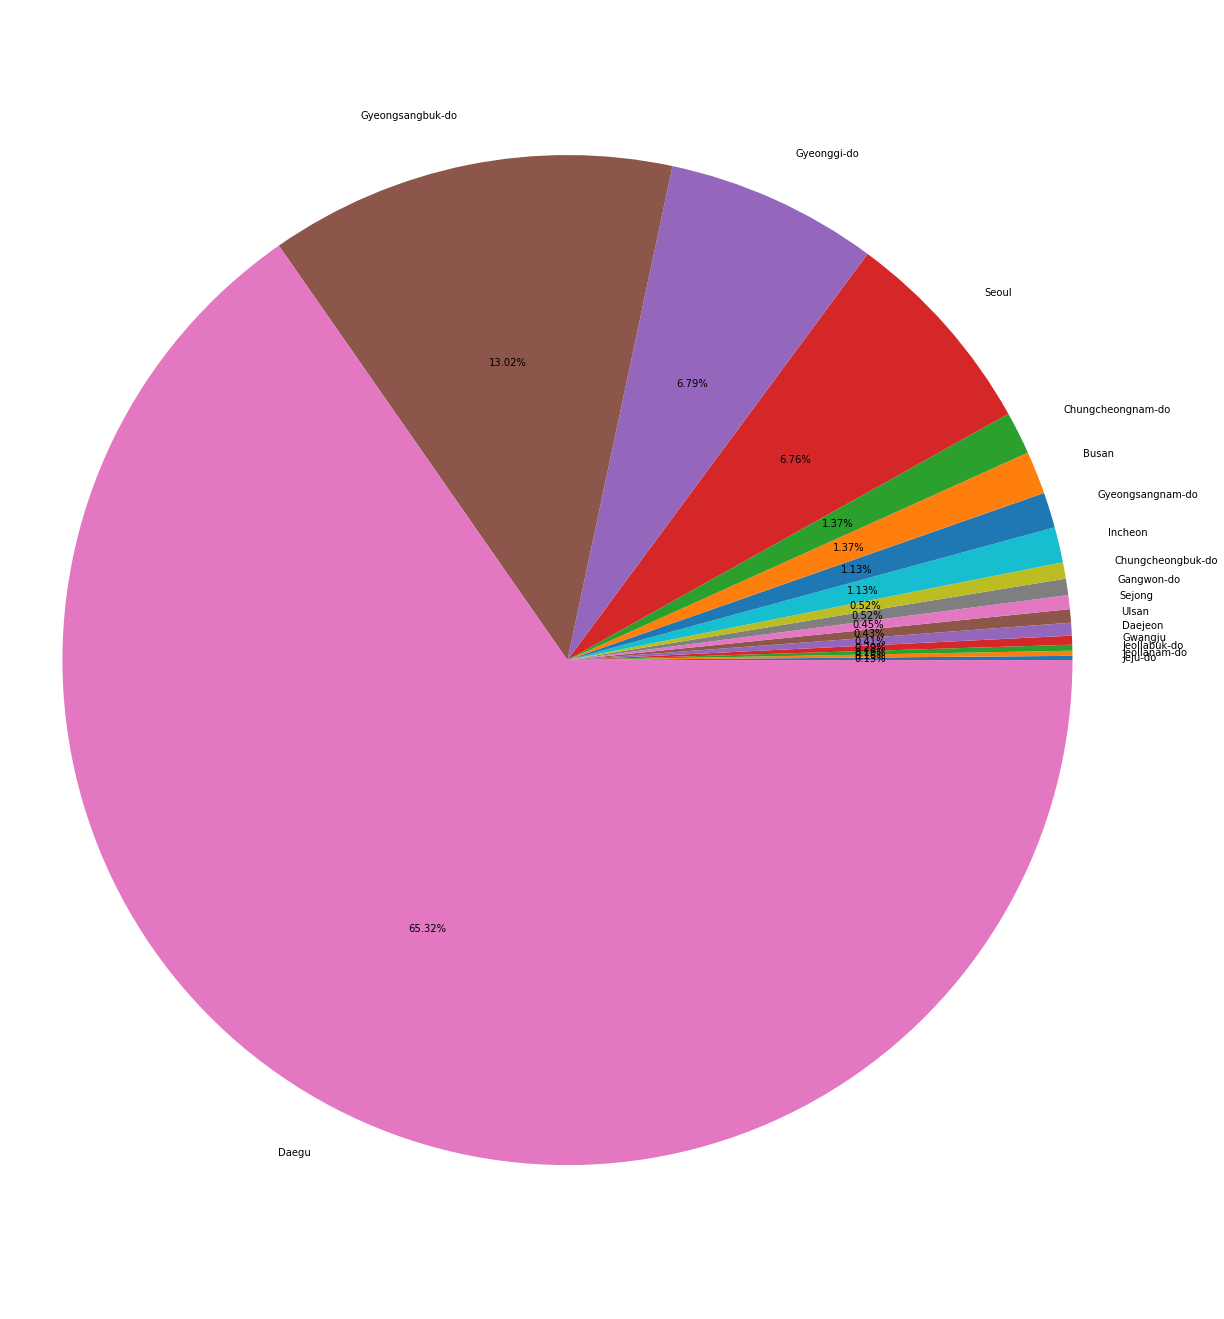

In [18]:
# last day confirmed percentage
order = pd.DataFrame()
order['province'] = province['province'].unique()
size = list(province.loc[province['date'] == '2020-05-14', 'confirmed'])
order['size'] = size
order = order.sort_values(by=['size'])

fig, ax = plt.subplots(figsize=(20,24))
ax.pie(order['size'], labels=order['province'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-5-14日各地區確診人數占比。

In [36]:
# fig, ax = plt.subplots(figsize=(20,24))
# ax.plot(province.date.unique(), province.loc[province['province'] == 'Daegu', 'confirmed'], color = 'blue', linewidth = 2)
# ax.set_xticks(ax.get_xticks()[::11])

In [37]:
# # Total
# total_list = province.groupby('date').sum().confirmed
# fig, ax = plt.subplots(figsize=(13, 7))
# plt.title('Cumulative Confirmed Cases (total)', fontsize=17)
# ax.set_xlabel('Date', size=13)
# ax.set_ylabel('Number of cases', size=13)
# plt.plot(province.date.unique()
#          , province.groupby('date').sum().confirmed)
# ax.set_xticks(ax.get_xticks()[::11])

In [38]:
# # Daegu
# loc = province.loc[province['province'] == 'Daegu']
# fig, ax = plt.subplots(figsize=(13, 7))
# plt.title('Cumulative Confirmed Cases (Daegu)', fontsize=17)
# ax.set_xlabel('Date', size=13)
# ax.set_ylabel('Number of cases', size=13)
# plt.plot(province.date.unique(), loc['confirmed'])
# ax.set_xticks(ax.get_xticks()[::11])

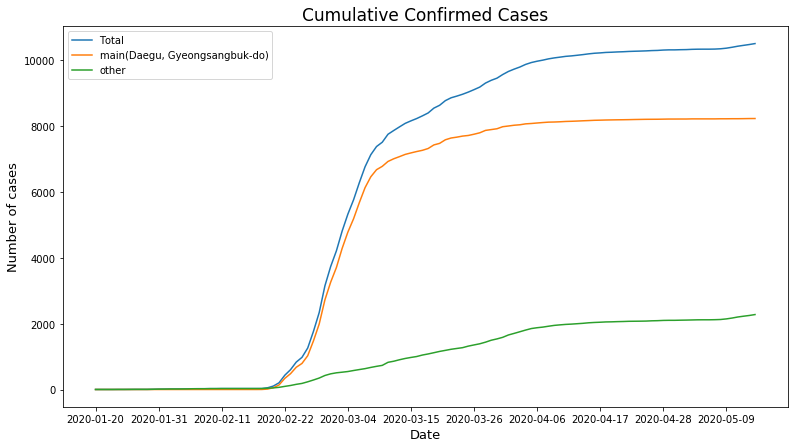

In [31]:
# Cumulative Confirmed Cases
# Total
total_list = province.groupby('date').sum().confirmed
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), province.groupby('date').sum().confirmed , label='Total')
# ax.set_xticks(ax.get_xticks()[::11])

# main
loc = province[(province.province=='Daegu') | (province.province=='Gyeongsangbuk-do')].groupby('date').sum().confirmed
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='main(Daegu, Gyeongsangbuk-do)')
# ax.set_xticks(ax.get_xticks()[::11])

# other
loc = province[(province.province!='Daegu') & (province.province!='Gyeongsangbuk-do')].groupby('date').sum().confirmed
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Confirmed Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='other')
ax.set_xticks(ax.get_xticks()[::11])

plt.legend(loc='upper left')

2月底特定地區大量指數型爆發，而其他地區線性增長，造成總確診數跟著指數型爆發。最後總確診數上揚與其他地區確診數上揚較為相關。

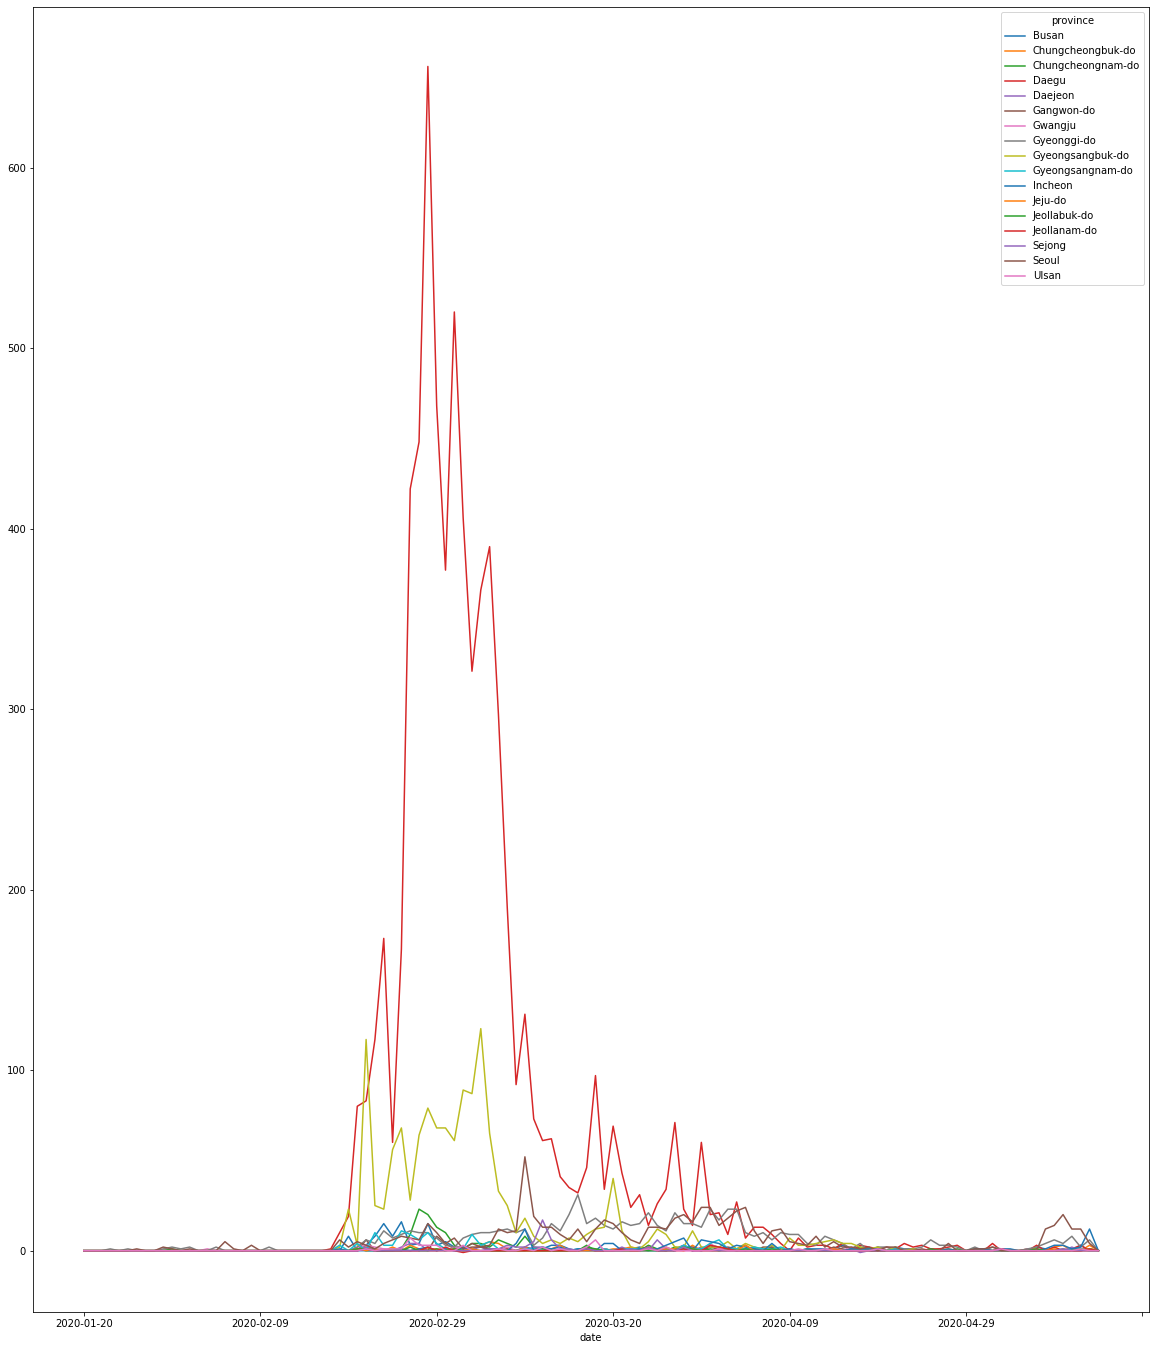

In [23]:
# daily confirmed
for title in province['province'].unique():
    day = province.loc[province['province']==title, 'confirmed']
    province.loc[province['province']==title, 'daily_confirmed'] = day.shift(-1) - day

province.groupby(['date','province'])['daily_confirmed'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))

每日確診數，高峰期後地區增長率相差不大。最後首爾地區梅日確診數突然爆發與上圖累計確診數相關。

## Deceased

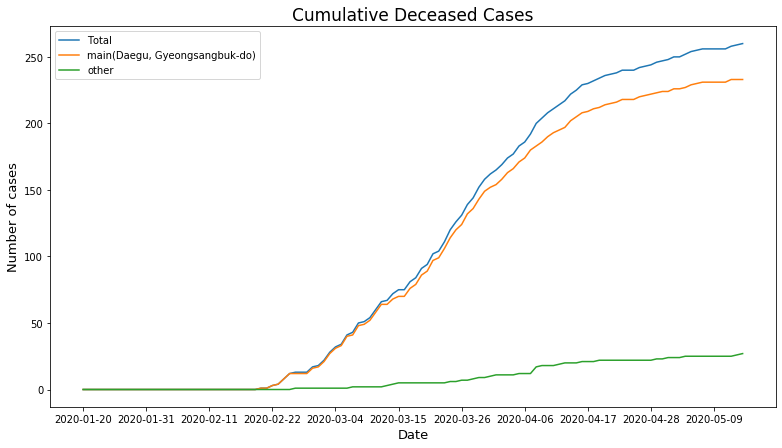

In [35]:
# Cumulative deceased Cases
# Total
total_list = province.groupby('date').sum().deceased
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Deceased Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), province.groupby('date').sum().deceased , label='Total')
# ax.set_xticks(ax.get_xticks()[::11])

# main
loc = province[(province.province=='Daegu') | (province.province=='Gyeongsangbuk-do')].groupby('date').sum().deceased
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Deceased Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='main(Daegu, Gyeongsangbuk-do)')
# ax.set_xticks(ax.get_xticks()[::11])

# other
loc = province[(province.province!='Daegu') & (province.province!='Gyeongsangbuk-do')].groupby('date').sum().deceased
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Deceased Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='other')
ax.set_xticks(ax.get_xticks()[::11])

plt.legend(loc='upper left')

總死亡數幾乎隨著主要爆發地區趨勢增長，而最後的上揚同樣是其他地區影響。

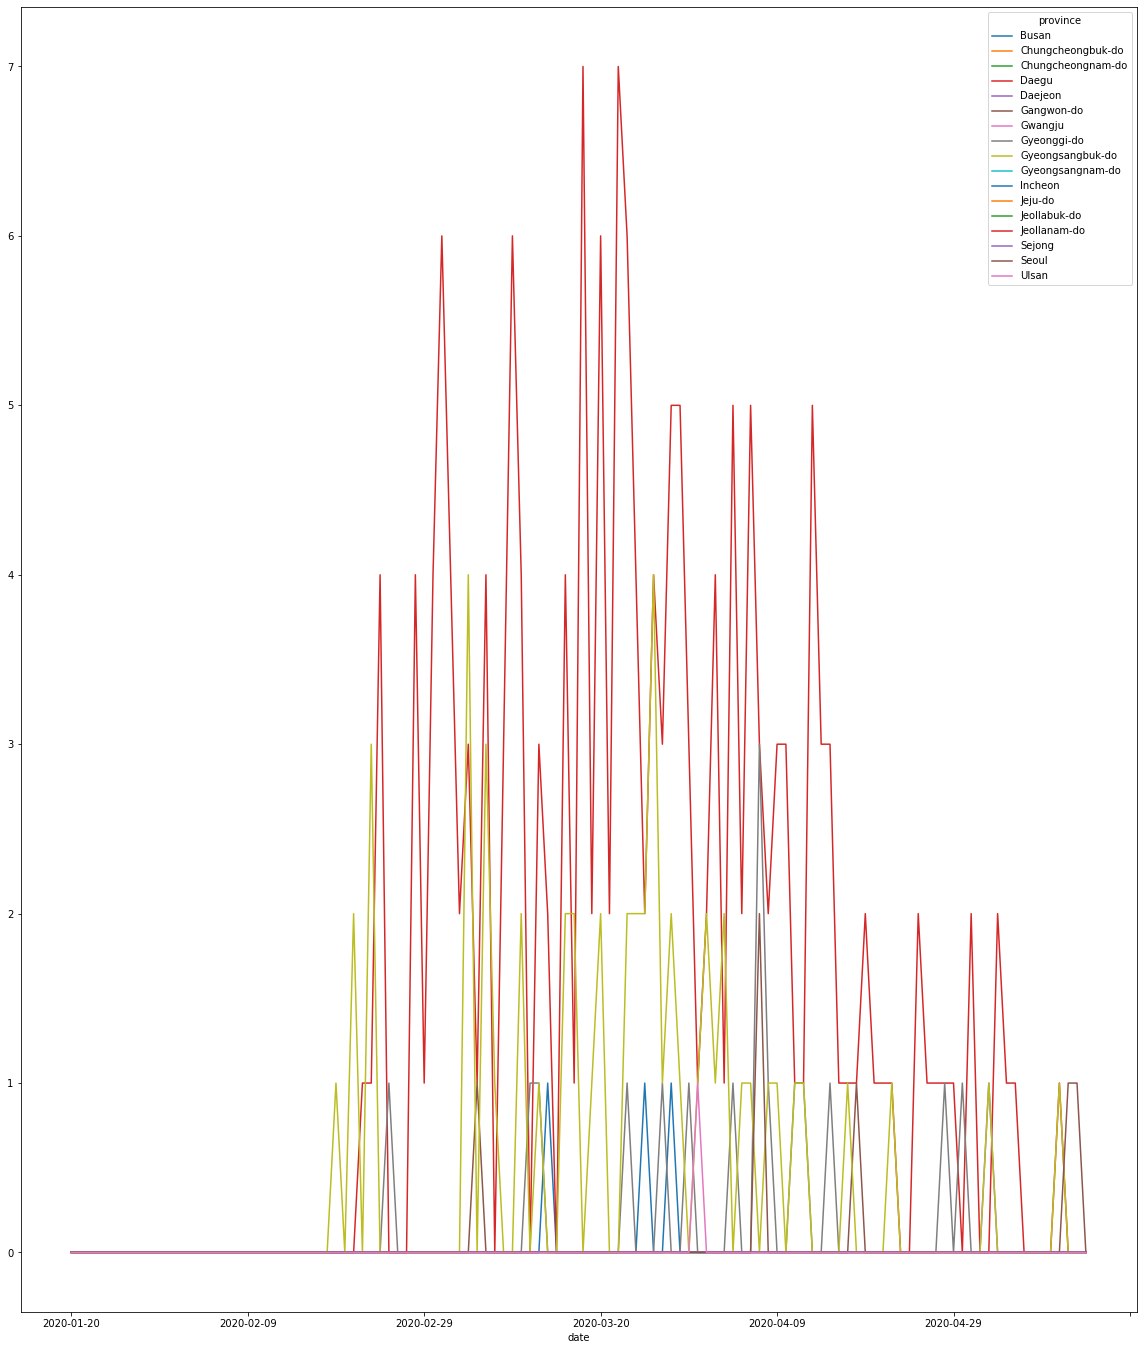

In [33]:
# daily deceased
for title in province['province'].unique():
    day = province.loc[province['province']==title, 'deceased']
    province.loc[province['province']==title, 'daily_deceased'] = day.shift(-1) - day

province.groupby(['date','province'])['daily_deceased'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))

最後死亡數上揚和病情爆發的首爾地區有關聯。

(-1.1139873190707088,
 1.1006660705941442,
 -1.1095146451338227,
 1.1240400815671001)

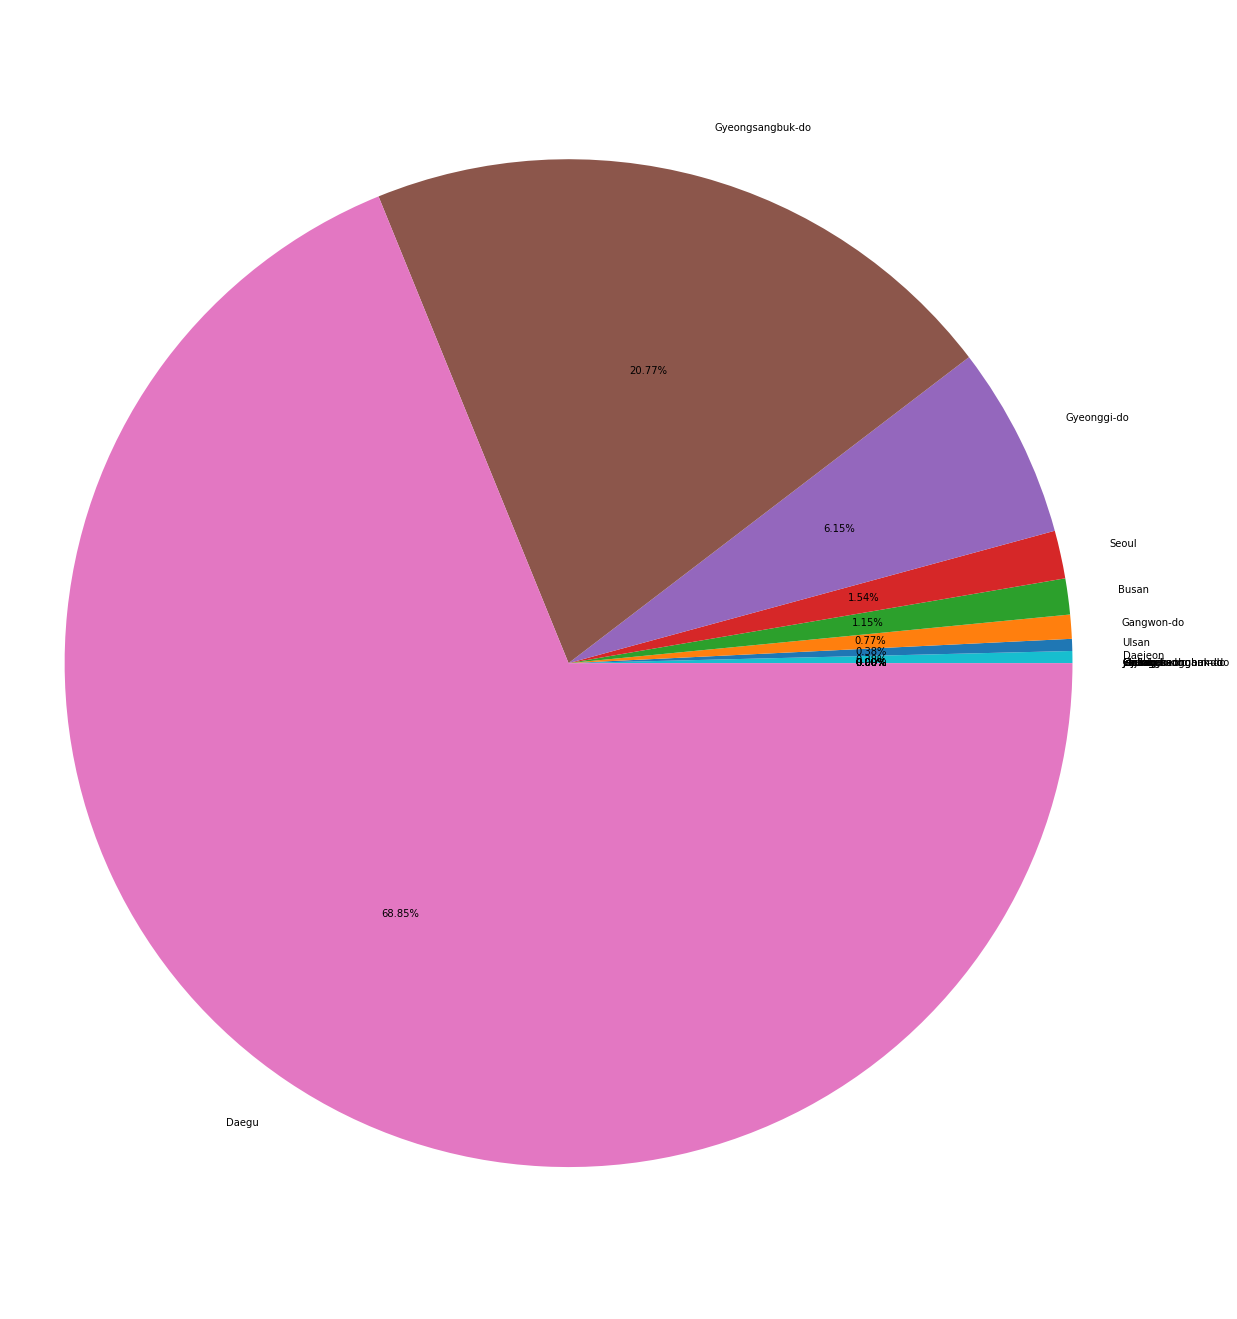

In [24]:
order = pd.DataFrame()
order['province'] = province['province'].unique()
size = list(province.loc[province['date'] == '2020-05-14', 'deceased'])
order['size'] = size
order = order.sort_values(by=['size'])

fig, ax = plt.subplots(figsize=(20,24))
ax.pie(order['size'], labels=order['province'], autopct='%.2f%%')
plt.axis('equal')

統計至2020-5-14日各地區死亡人數占比。

## Released

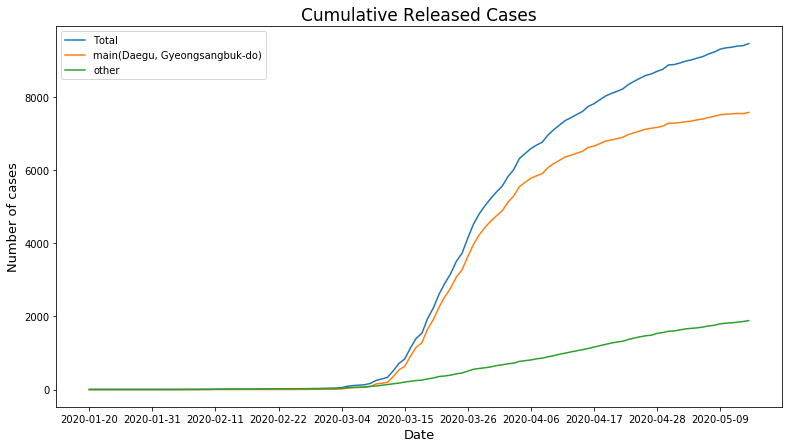

In [34]:
# Cumulative released Cases
# Total
total_list = province.groupby('date').sum().released
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Released Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), province.groupby('date').sum().released , label='Total')
# ax.set_xticks(ax.get_xticks()[::11])

# main
loc = province[(province.province=='Daegu') | (province.province=='Gyeongsangbuk-do')].groupby('date').sum().released
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Released Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='main(Daegu, Gyeongsangbuk-do)')
# ax.set_xticks(ax.get_xticks()[::11])

# other
loc = province[(province.province!='Daegu') & (province.province!='Gyeongsangbuk-do')].groupby('date').sum().released
# fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Cumulative Released Cases', fontsize=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.plot(province.date.unique(), loc, label='other')
ax.set_xticks(ax.get_xticks()[::11])

plt.legend(loc='upper left')

(-1.1030120209484613,
 1.1001434295689743,
 -1.1019600087418704,
 1.1088019997781309)

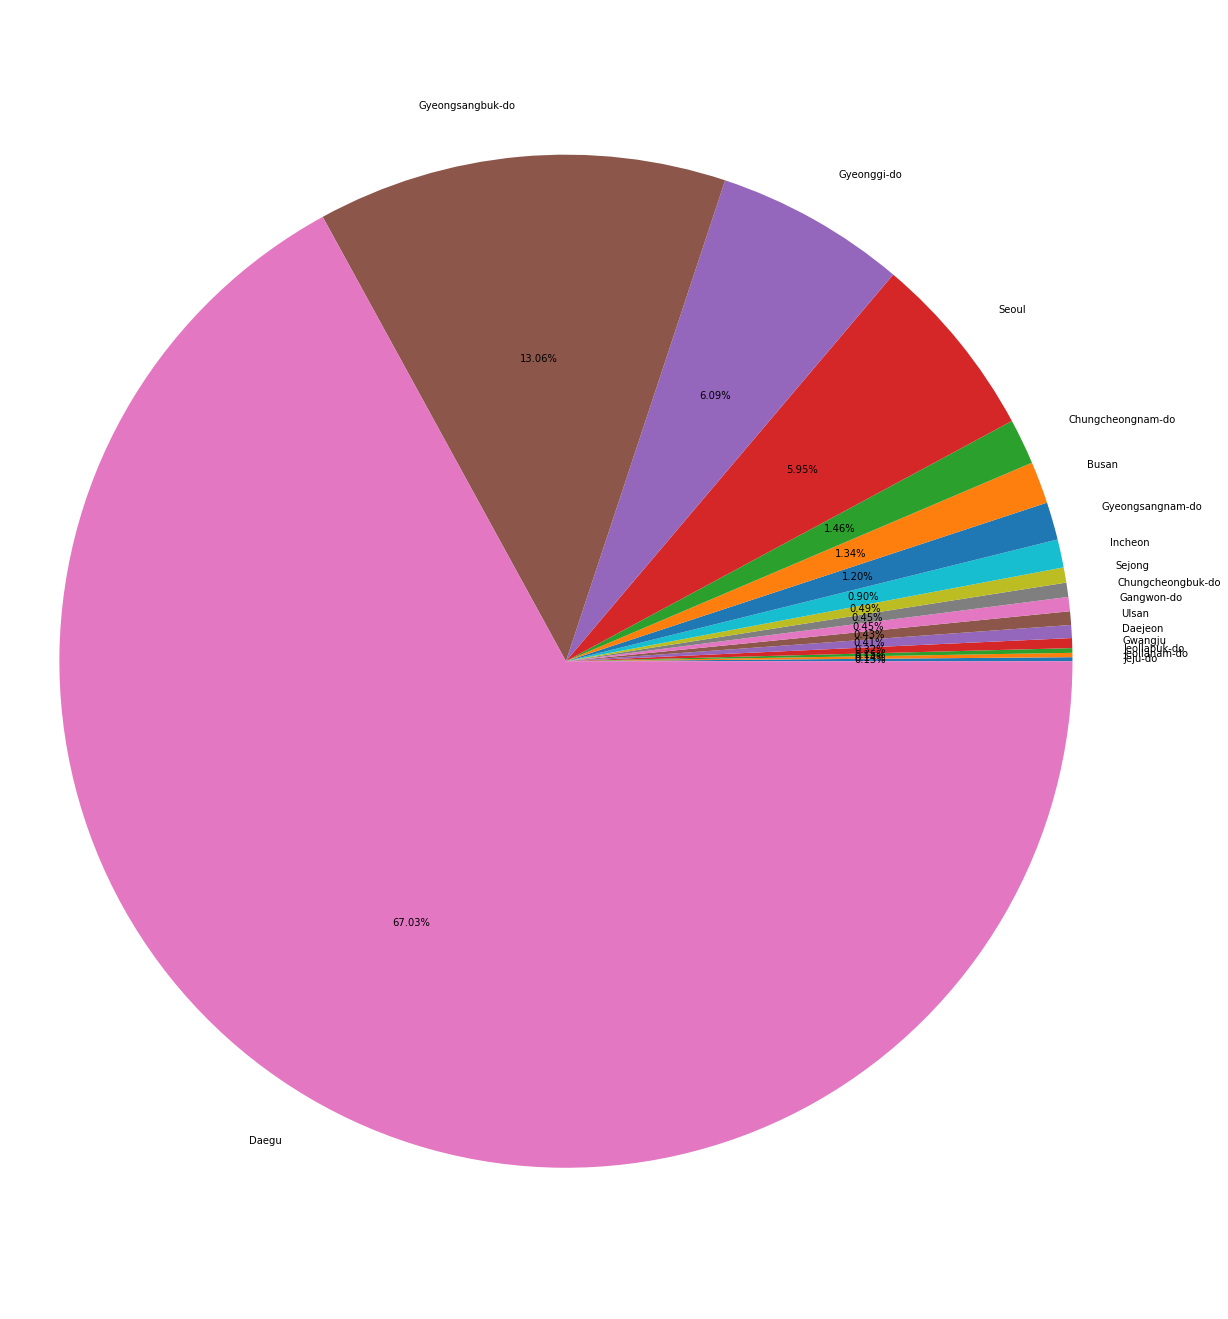

In [26]:
order = pd.DataFrame()
order['province'] = province['province'].unique()
size = list(province.loc[province['date'] == '2020-05-14', 'released'])
order['size'] = size
order = order.sort_values(by=['size'])

fig, ax = plt.subplots(figsize=(20,24))
ax.pie(order['size'], labels=order['province'], autopct='%.2f%%')
plt.axis('equal')

隔離釋放人數也是爆發地區占多數，可能與爆發地區大規模篩檢有關。

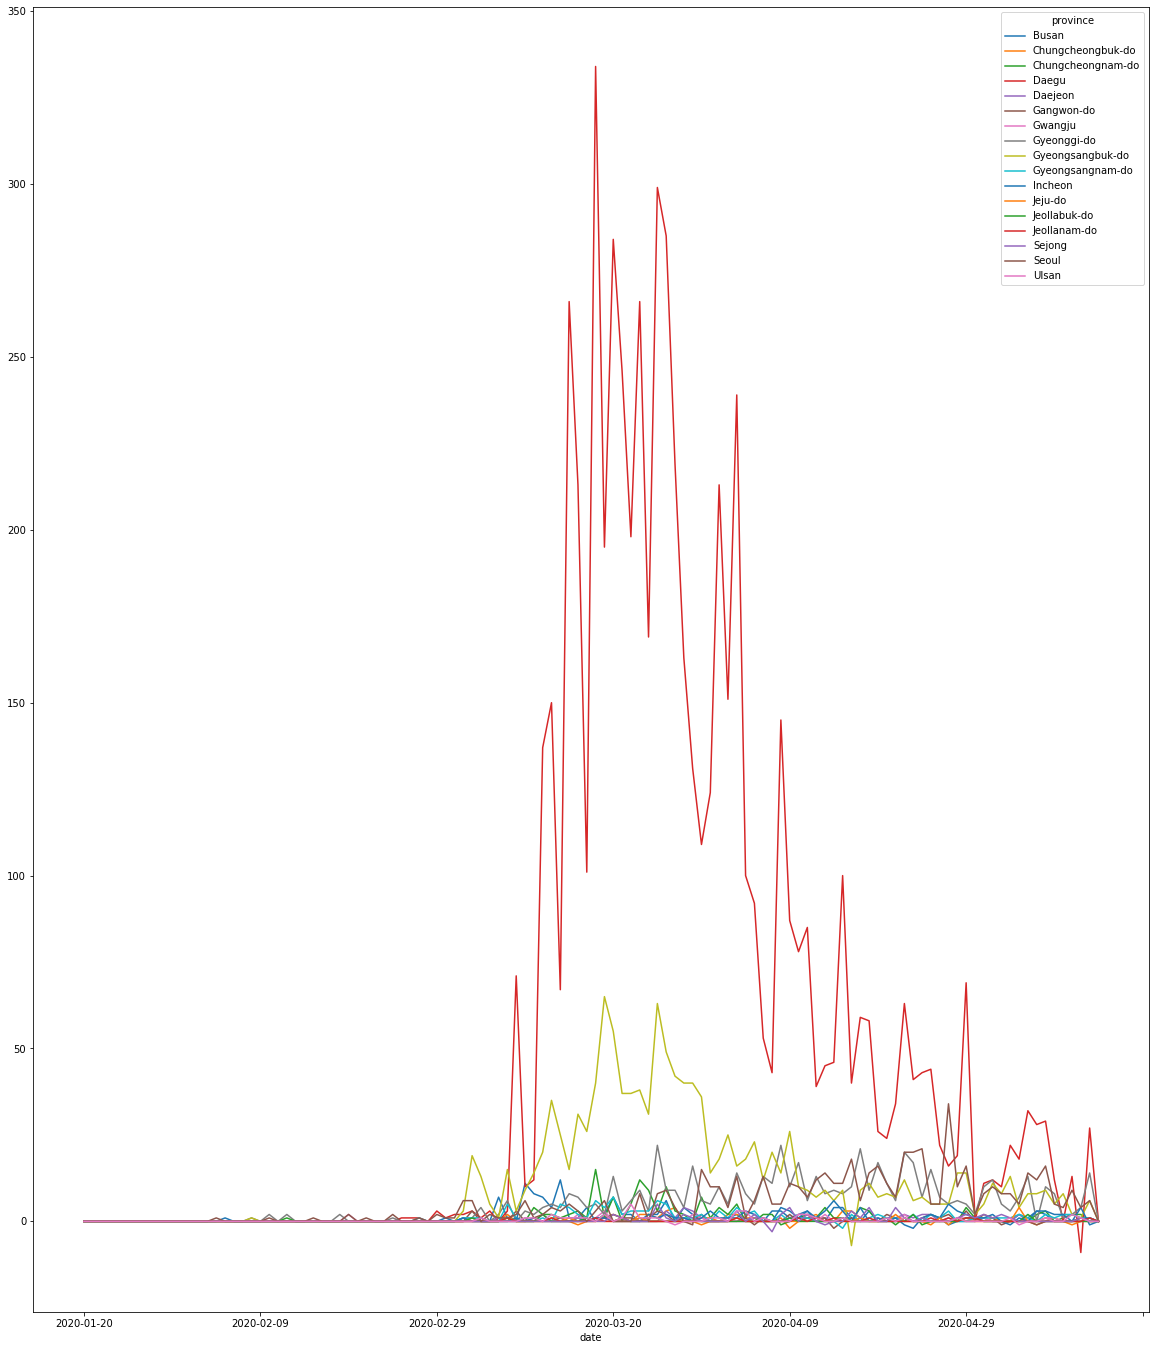

In [44]:
# daily released
for title in province['province'].unique():
    day = province.loc[province['province']==title, 'released']
    province.loc[province['province']==title, 'daily_released'] = day.shift(-1) - day

province.groupby(['date','province'])['daily_released'].sum() .unstack('province', fill_value=0).plot(legend=True, figsize=(20,24))

表為每日從隔離中釋放人數，其中負數代表復陽的情況或是統計錯誤或是該病患死亡，單純從時間上不得而知。